Data Analysis code on my paper "Up-To-Date Exploratory Analysis on 4434 Confirmed Exoplanets and an Insight on Detection Methods Sensitivity"

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.patches as mpatches
import pandas as pd
import math
import matplotlib.lines as mlines
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize
from astropy.table import QTable
import astropy.units as u

%matplotlib inline

#setting up data frame
data = pd.read_csv('4422 confirmed exoplanets.csv')
data = data.drop(columns="rastr")
data = data.drop(columns="decstr")
data.head()
print(data.shape)

(4422, 16)


In [301]:
#renaming the columns
column_dict = {
    'pl_name':'Planet Name',
    'hostname':'Host Name',
    'sy_snum':'Number of Stars',
    'discoverymethod':'Detection Method',
    'pl_orbper':'Orbital Period',
    'pl_orbsmax':'Orbit Semi-Major Axis',
    'pl_rade':'Planet Radius',
    'pl_bmasse':'Planet Mass',
    'pl_insol':'Insolation Flux',
    'pl_eqt':'Equilibrium Temperature',
    'st_teff':'Stellar Effective Temperature',
    'st_rad':'Stellar Radius',
    'st_mass':'Stellar Mass',
    'ra':'RA [degree]',
    'dec':'Dec [degree]',
    'sy_dist':'Distance'
}

In [302]:
data.rename(columns=column_dict, inplace=True)

In [303]:
data.head()

,Planet Name,Host Name,Number of Stars,Detection Method,Orbital Period,Orbit Semi-Major Axis,Planet Radius,Planet Mass,Insolation Flux,Equilibrium Temperature,Stellar Effective Temperature,Stellar Radius,Stellar Mass,RA [degree],Dec [degree],Distance
0,11 Com b,11 Com,2,Radial Velocity,326.03000,1.29,12.1,6165.6000,NaN,NaN,4742.0,19.00,2.70,185.178779,17.793252,93.1846
1,11 UMi b,11 UMi,1,Radial Velocity,516.21997,1.53,12.3,4684.8142,NaN,NaN,4213.0,29.79,2.78,229.274595,71.823943,125.3210
2,14 And b,14 And,1,Radial Velocity,185.84000,0.83,12.9,1525.5000,NaN,NaN,4813.0,11.00,2.20,352.824150,39.235837,75.4392
3,14 Her b,14 Her,1,Radial Velocity,1773.40002,2.93,12.9,1481.0878,NaN,NaN,5338.0,0.93,0.90,242.602101,43.816362,17.9323
4,16 Cyg B b,16 Cyg B,3,Radial Velocity,798.50000,1.66,13.5,565.7374,NaN,NaN,5750.0,1.13,1.08,295.465642,50.516824,21.1397


In [304]:
#Plot 1: Orbital Period vs Planet Mass vs Detection Method

In [305]:
#finding x and y limits
print(data['Orbital Period'].max())
print(10**7)
print(data['Planet Mass'].max())
print(3*10**5)

8040000.0
10000000
239000.0
300000


In [306]:
#setting graph defaults
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

In [307]:
#function to create a new empty with standard plot format
def InitializePlot(xscale, yscale, xlim_i, xlim_f, ylim_i, ylim_f, xlabel, ylabel):
    plt.clf() #create a new window for the plot
    f = plt.figure(figsize=(8,8))
    #pyplot.xscale('log')
    #pyplot.yscale('log')
    pyplot.xscale(xscale)
    pyplot.yscale(yscale)
    #plt.xlim(1, 10**5)
    #plt.ylim(1, 10**4)
    plt.xlim(xlim_i, xlim_f)
    plt.ylim(ylim_i, ylim_f)
    #plt.xlabel('Orbit Period (Earth Days)')
    #plt.ylabel('Planet Mass (Earth Mass)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [308]:
#function to save data (for habitable zone boolean flag and exoplanet classification)
def WriteCatalog(catalogName, params, paramNameString):
    #first, create and open the text file for writing. Choose a name: 
    catalog = open(catalogName, 'w')

    #write first row
    catalog.write('# ' + paramNameString + '\n')

    #then, loop through exoplanets and write 1 row for each exoplanet.
    for i in range(len(params[0])): #loop over stars
        for j in range(len(params)): #loop over parameters (ra, dec, v, verr,...)
            catalog.write(str(params[j][i]))
            catalog.write(' ')
        catalog.write('\n')
    catalog.close()

    return

Transit                          3343
Radial Velocity                   864
Microlensing                      108
Imaging                            53
Transit Timing Variations          21
Eclipse Timing Variations          16
Pulsar Timing                       7
Orbital Brightness Modulation       6
Pulsation Timing Variations         2
Disk Kinematics                     1
Astrometry                          1
Name: Detection Method, dtype: int64


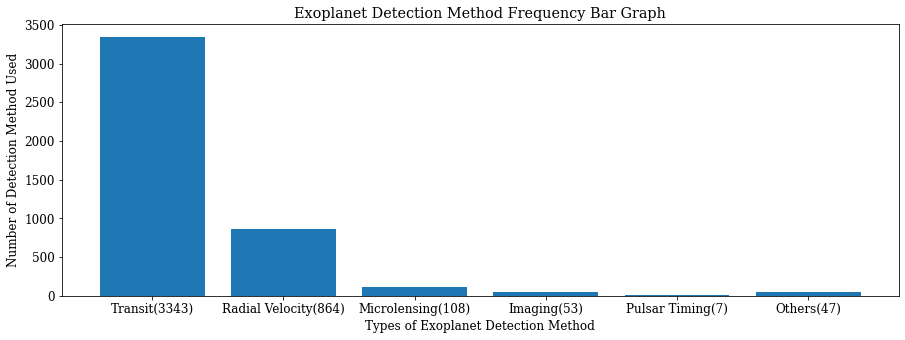

In [309]:
#frequencey of appearance of each detection method
pl_method = data[data.columns[3]]

pl_unique_method = list(set(pl_method))
#print(pl_unique_method)

print(data['Detection Method'].value_counts())

#Exoplanets Within Habitable Zone, Exoplanets Outside of Habitable Zone

plt.figure(figsize=(15,5))
mpl.rcParams['font.size']=12
plt.xlabel("Types of Exoplanet Detection Method")
plt.ylabel("Number of Detection Method Used")
x = np.arange(6)
plt.bar(x, height=[3343,864,108,53,7,47])
plt.xticks(x, ['Transit(3343)', 'Radial Velocity(864)','Microlensing(108)','Imaging(53)','Pulsar Timing(7)','Others(47)'])
plt.title("Exoplanet Detection Method Frequency Bar Graph")
plt.savefig("Exoplanet Detection Method Frequency Bar Graph.jpg")

<Figure size 432x288 with 0 Axes>

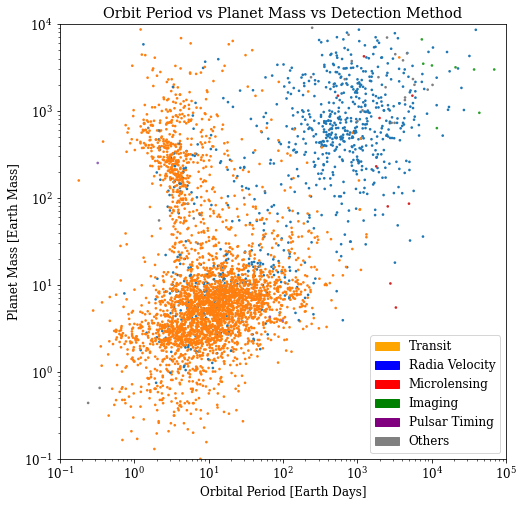

In [310]:
#graphing Orbital Period vs Planet Mass vs Detection Method
pl_op = data[data.columns[4]]
pl_m = data[data.columns[7]]

colors = {'Transit':'tab:orange', 'Radial Velocity':'tab:blue', 'Microlensing':'tab:red', 'Imaging':'tab:green', 'Pulsar Timing':'tab:purple', 'Transit Timing Variations':'tab:gray', 'Eclipse Timing Variations':'tab:gray', 'Orbital Brightness Modulation':'tab:gray', 'Pulsation Timing Variations':'tab:gray', 'Astrometry':'tab:gray', 'Disk Kinematics':'tab:gray'}
#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-1, 10**5, 10**-1, 10**4, 'Orbital Period [Earth Days]', 'Planet Mass [Earth Mass]')

#legend
orange = mpatches.Patch(color='orange', label='Transit')
blue = mpatches.Patch(color='blue', label='Radia Velocity')
red = mpatches.Patch(color='red', label='Microlensing')
green = mpatches.Patch(color='green', label='Imaging')
purple = mpatches.Patch(color='purple', label='Pulsar Timing')
gray = mpatches.Patch(color='gray', label='Others')

plt.legend(handles=[orange, blue, red, green, purple, gray])

plt.scatter(pl_op, pl_m, c = data['Detection Method'].map(colors), s = 7, edgecolors = 'none')
plt.title('Orbit Period vs Planet Mass vs Detection Method')


plt.savefig("Orbit Period vs Planet Mass vs Detection Method.jpg")

#feedback: try different symbols for each detection method (at least ones for less-data methods), sensetivity

<Figure size 432x288 with 0 Axes>

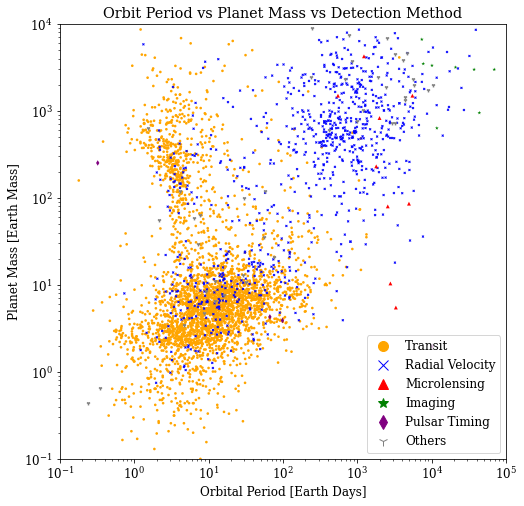

In [311]:
#graphing Orbital Period vs Planet Mass vs Detection Method with different marker
transit = []
rv = []
micro = []
imaging = []
pulsar = []
others = []

for i in range(4422):
    if data['Detection Method'][i] == 'Transit':
        transit.append(i)
        
    elif data['Detection Method'][i] == 'Radial Velocity':
        rv.append(i)
        
    elif data['Detection Method'][i] == 'Microlensing':
        micro.append(i)
        
    elif data['Detection Method'][i] == 'Imaging':
        imaging.append(i)
        
    elif data['Detection Method'][i] == 'Pulsar Timing':
        pulsar.append(i)
        
    else:
        others.append(i)


f = InitializePlot('log', 'log', 10**-1, 10**5, 10**-1, 10**4, 'Orbital Period [Earth Days]', 'Planet Mass [Earth Mass]')

orange = mlines.Line2D([], [], color='orange', marker='o', linestyle='None',
                          markersize=10, label='Transit')
blue = mlines.Line2D([], [], color='blue', marker='x', linestyle='None',
                          markersize=10, label='Radial Velocity')
red = mlines.Line2D([], [], color='red', marker='^', linestyle='None',
                          markersize=10, label='Microlensing')
green = mlines.Line2D([], [], color='green', marker='*', linestyle='None',
                          markersize=10, label='Imaging')
purple = mlines.Line2D([], [], color='purple', marker='d', linestyle='None',
                          markersize=10, label='Pulsar Timing')
gray = mlines.Line2D([], [], color='gray', marker='1', linestyle='None',
                          markersize=10, label='Others')

plt.legend(handles=[orange, blue, red, green, purple, gray])

plt.scatter(pl_op[transit], pl_m[transit], c = 'orange', marker="o", s = 7, edgecolors = 'none')
plt.scatter(pl_op[rv], pl_m[rv], c = 'blue', marker="X", s = 7, edgecolors = 'none')
plt.scatter(pl_op[micro], pl_m[micro], c = 'red', marker="^", s = 15, edgecolors = 'none')
plt.scatter(pl_op[imaging], pl_m[imaging], c = 'green', marker="*", s = 15, edgecolors = 'none')
plt.scatter(pl_op[pulsar], pl_m[pulsar], c = 'purple', marker="d", s = 15, edgecolors = 'none')
plt.scatter(pl_op[others], pl_m[others], c = 'gray', marker="1", s = 15, edgecolors = 'none')


plt.title('Orbit Period vs Planet Mass vs Detection Method')

plt.savefig("Orbit Period vs Planet Mass vs Detection Method w different markers.jpg")

<Figure size 432x288 with 0 Axes>

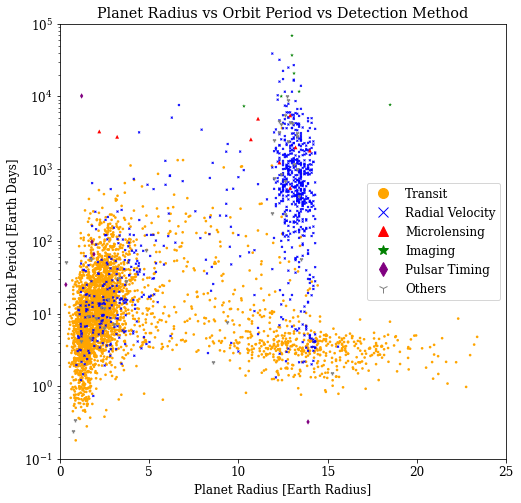

In [312]:
pl_op = data[data.columns[4]]
pl_r = data[data.columns[6]]

#graphing Orbital Period vs Planet Mass vs Detection Method with different marker
transit = []
rv = []
micro = []
imaging = []
pulsar = []
others = []

for i in range(4422):
    if data['Detection Method'][i] == 'Transit':
        transit.append(i)
        
    elif data['Detection Method'][i] == 'Radial Velocity':
        rv.append(i)
        
    elif data['Detection Method'][i] == 'Microlensing':
        micro.append(i)
        
    elif data['Detection Method'][i] == 'Imaging':
        imaging.append(i)
        
    elif data['Detection Method'][i] == 'Pulsar Timing':
        pulsar.append(i)
        
    else:
        others.append(i)


f = InitializePlot('linear', 'log', 0, 25, 10**-1, 10**5, 'Planet Radius [Earth Radius]', 'Orbital Period [Earth Days]')

orange = mlines.Line2D([], [], color='orange', marker='o', linestyle='None',
                          markersize=10, label='Transit')
blue = mlines.Line2D([], [], color='blue', marker='x', linestyle='None',
                          markersize=10, label='Radial Velocity')
red = mlines.Line2D([], [], color='red', marker='^', linestyle='None',
                          markersize=10, label='Microlensing')
green = mlines.Line2D([], [], color='green', marker='*', linestyle='None',
                          markersize=10, label='Imaging')
purple = mlines.Line2D([], [], color='purple', marker='d', linestyle='None',
                          markersize=10, label='Pulsar Timing')
gray = mlines.Line2D([], [], color='gray', marker='1', linestyle='None',
                          markersize=10, label='Others')

plt.legend(handles=[orange, blue, red, green, purple, gray])

plt.scatter(pl_r[transit], pl_op[transit], c = 'orange', marker="o", s = 7, edgecolors = 'none')
plt.scatter(pl_r[rv], pl_op[rv], c = 'blue', marker="X", s = 7, edgecolors = 'none')
plt.scatter(pl_r[micro], pl_op[micro], c = 'red', marker="^", s = 15, edgecolors = 'none')
plt.scatter(pl_r[imaging], pl_op[imaging], c = 'green', marker="*", s = 15, edgecolors = 'none')
plt.scatter(pl_r[pulsar], pl_op[pulsar], c = 'purple', marker="d", s = 15, edgecolors = 'none')
plt.scatter(pl_r[others], pl_op[others], c = 'gray', marker="1", s = 15, edgecolors = 'none')


plt.title('Planet Radius vs Orbit Period vs Detection Method')

plt.savefig("Orbit Period vs Planet Radius vs Detection Method w different markers.jpg")

In [313]:
# Planet Radius vs Flux

In [314]:
print(data['Insolation Flux'].max())
print(10**4)
print(data['Planet Radius'].max())
print(3*10**5)

44900.0
10000
77.342
300000


<Figure size 432x288 with 0 Axes>

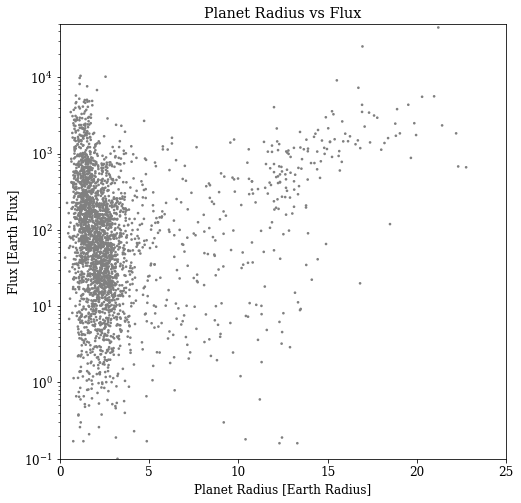

In [315]:
pl_r = data[data.columns[6]]
pl_flux = data[data.columns[8]]

#f = InitializePlot()
f = InitializePlot('linear', 'log', 0, 25, 10**-1, 5*10**4, 'Planet Radius [Earth Radius]', 'Flux [Earth Flux]')


plt.scatter(pl_r, pl_flux, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Flux')

plt.savefig("Planet Radius vs Flux.jpg")

#feedbacd: caculate flux by myself -> x
#feedback: flux dependent on distance (separation), size/type of host star, color/size for (star) another variable
#vertical & horizontal lines -> histogram with each type

count     4306.000000
mean      5460.513070
std       1809.769841
min        575.000000
25%       4976.000000
50%       5568.500000
75%       5908.000000
max      57000.000000
Name: Stellar Effective Temperature, dtype: float64


<Figure size 432x288 with 0 Axes>

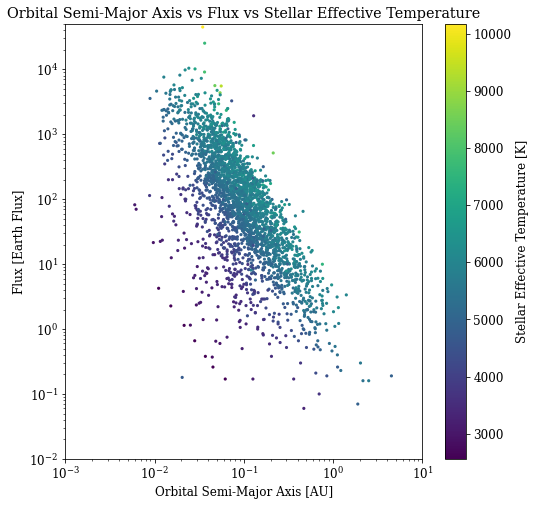

In [316]:
pl_flux = data[data.columns[8]]
pl_osa = data[data.columns[5]]
st_temp = data["Stellar Effective Temperature"]

#print(data[data.columns[8]].describe())
#print(data[data.columns[5]].describe())
print(data["Stellar Effective Temperature"].describe())


#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-3, 10**1, 10**-2, 5*10**4, 'Orbital Semi-Major Axis [AU]', 'Flux [Earth Flux]')


plt.scatter(pl_osa, pl_flux, c = st_temp, s = 10, edgecolors = 'none')

plt.colorbar(label = "Stellar Effective Temperature [K]", )

plt.title('Orbital Semi-Major Axis vs Flux vs Stellar Effective Temperature')

plt.savefig("Orbital Semi-Major Axis vs Flux vs Stellar Temperature.jpg")

#feedbacd: caculate flux by myself -> x
#feedback: flux dependent on distance (separation), size/type of host star, color/size for (star) another variable
#vertical & horizontal lines -> histogram with each type

In [370]:
st_temp.describe()
pl_osa.describe()
pl_flux.describe()

count     2806.000000
mean       363.496033
std       1243.498926
min          0.060000
25%         21.522500
50%         83.045000
75%        289.477500
max      44900.000000
Name: Insolation Flux, dtype: float64

count     4306.000000
mean      5460.513070
std       1809.769841
min        575.000000
25%       4976.000000
50%       5568.500000
75%       5908.000000
max      57000.000000
Name: Stellar Effective Temperature, dtype: float64


<Figure size 432x288 with 0 Axes>

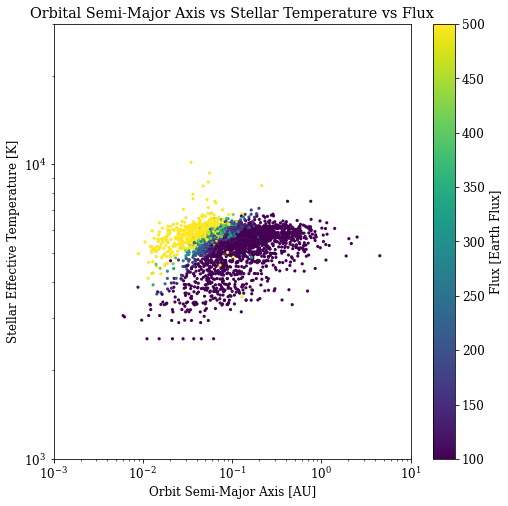

In [378]:
pl_flux = data[data.columns[8]]
pl_osa = data[data.columns[5]]
st_temp = data["Stellar Effective Temperature"]

#print(data[data.columns[8]].describe())
#print(data[data.columns[5]].describe())
print(data["Stellar Effective Temperature"].describe())


#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-3, 10**1, 10**3, 3*10**4, 'Orbit Semi-Major Axis [AU]', 'Stellar Effective Temperature [K]')

plt.scatter(pl_osa, st_temp, c = pl_flux, s = 10, edgecolors = 'none')

plt.colorbar(label = "Flux [Earth Flux]", )
plt.clim(100, 500) 

plt.title('Orbital Semi-Major Axis vs Stellar Temperature vs Flux')

plt.savefig("Orbital Semi-Major Axis vs Stellar Temperature vs Flux.jpg")


#feedbacd: caculate flux by myself -> x
#feedback: flux dependent on distance (separation), size/type of host star, color/size for (star) another variable
#vertical & horizontal lines -> histogram with each type

count     4306.000000
mean      5460.513070
std       1809.769841
min        575.000000
25%       4976.000000
50%       5568.500000
75%       5908.000000
max      57000.000000
Name: Stellar Effective Temperature, dtype: float64


Text(0.5, 1.0, 'Orbital Semi-Major Axis vs Stellar Effective Temperature vs Flux')

<Figure size 432x288 with 0 Axes>

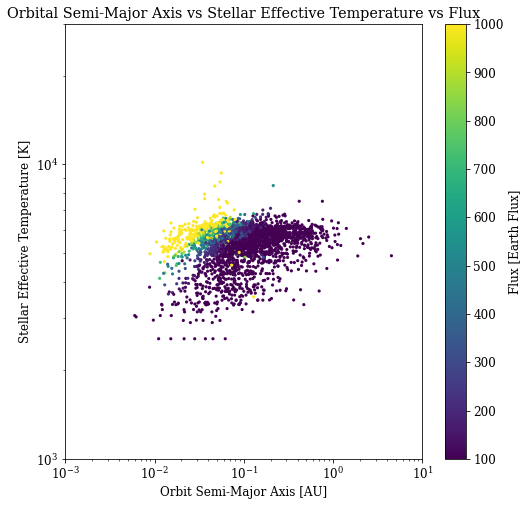

In [375]:
pl_flux = data[data.columns[8]]
pl_osa = data[data.columns[5]]
st_temp = data["Stellar Effective Temperature"]

#print(data[data.columns[8]].describe())
#print(data[data.columns[5]].describe())
print(data["Stellar Effective Temperature"].describe())


#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-3, 10**1, 10**3, 3*10**4, 'Orbit Semi-Major Axis [AU]', 'Stellar Effective Temperature [K]')

plt.scatter(pl_osa, st_temp, c = pl_flux, s = 10, edgecolors = 'none')

plt.colorbar(label = "Flux [Earth Flux]", )
plt.clim(100, 1000) 

plt.title('Orbital Semi-Major Axis vs Stellar Effective Temperature vs Flux')


#feedbacd: caculate flux by myself -> x
#feedback: flux dependent on distance (separation), size/type of host star, color/size for (star) another variable
#vertical & horizontal lines -> histogram with each type

In [317]:
#Planet Radius vs Planet Mass
"""
def InitializePlot():
    plt.clf() #create a new window for the plot
    f = plt.figure(figsize=(8,8))
    pyplot.xscale('linear')
    pyplot.yscale('log')
    plt.xlim(1, 25)
    plt.ylim(1, 10**4)
    plt.xlabel('Planet Radius (Earth Radius)')
    plt.ylabel('Planet Mass (Earth Mass)')
"""

"\ndef InitializePlot():\n    plt.clf() #create a new window for the plot\n    f = plt.figure(figsize=(8,8))\n    pyplot.xscale('linear')\n    pyplot.yscale('log')\n    plt.xlim(1, 25)\n    plt.ylim(1, 10**4)\n    plt.xlabel('Planet Radius (Earth Radius)')\n    plt.ylabel('Planet Mass (Earth Mass)')\n"

<Figure size 432x288 with 0 Axes>

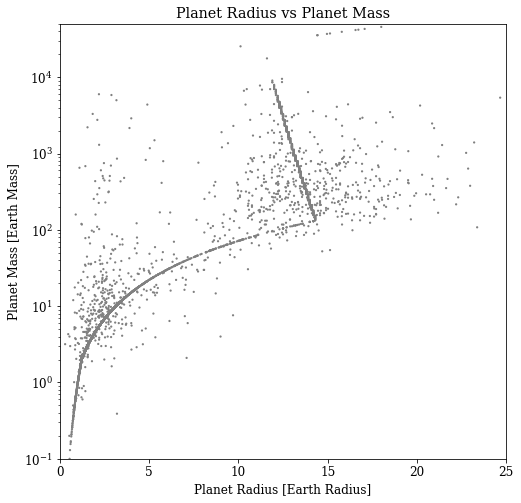

In [318]:
#f = InitializePlot()
f = InitializePlot('linear', 'log', 0, 25, 10**-1, 5*10**4, 'Planet Radius [Earth Radius]', 'Planet Mass [Earth Mass]')

plt.scatter(pl_r, pl_m, c = 'gray', s = 5, edgecolors = 'none')
plt.title('Planet Radius vs Planet Mass')

plt.savefig("Planet Radius vs Planet Mass.jpg")
#strange curve + straight line symbol???

<Figure size 432x288 with 0 Axes>

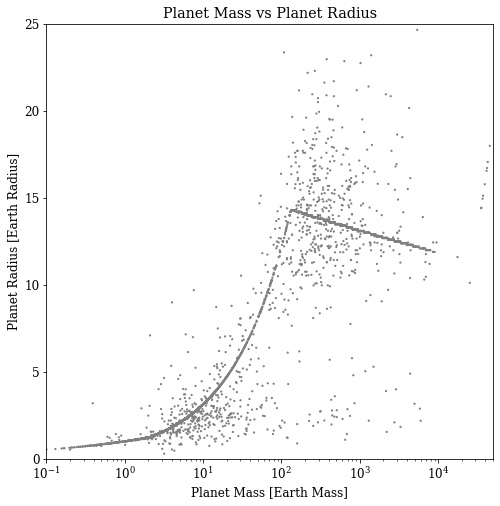

In [319]:
#f = InitializePlot()
f = InitializePlot('log', 'linear', 10**-1, 5*10**4, 0, 25, 'Planet Mass [Earth Mass]', 'Planet Radius [Earth Radius]')

plt.scatter(pl_m, pl_r, c = 'gray', s = 5, edgecolors = 'none')
plt.title('Planet Mass vs Planet Radius')

plt.savefig("Planet Mass vs Planet Radius.jpg")
#strange curve + straight line symbol???

In [320]:
# planet radius vs orbital semi-major axis
"""
def InitializePlot():
    plt.clf() #create a new window for the plot
    f = plt.figure(figsize=(8,8))
    pyplot.xscale('linear')
    pyplot.yscale('log')
    plt.xlim(1, 20)
    plt.ylim(1, 10**3)
    plt.xlabel('Planet Radius (Earth Radius)')
    plt.ylabel('Orbit Semi-Major Axis (AU)')
"""

"\ndef InitializePlot():\n    plt.clf() #create a new window for the plot\n    f = plt.figure(figsize=(8,8))\n    pyplot.xscale('linear')\n    pyplot.yscale('log')\n    plt.xlim(1, 20)\n    plt.ylim(1, 10**3)\n    plt.xlabel('Planet Radius (Earth Radius)')\n    plt.ylabel('Orbit Semi-Major Axis (AU)')\n"

In [321]:
print(data['Orbit Semi-Major Axis'].max())
print(4*10**3)
print(data['Planet Radius'].max())
print(3*10**5)

3500.0
4000
77.342
300000


<Figure size 432x288 with 0 Axes>

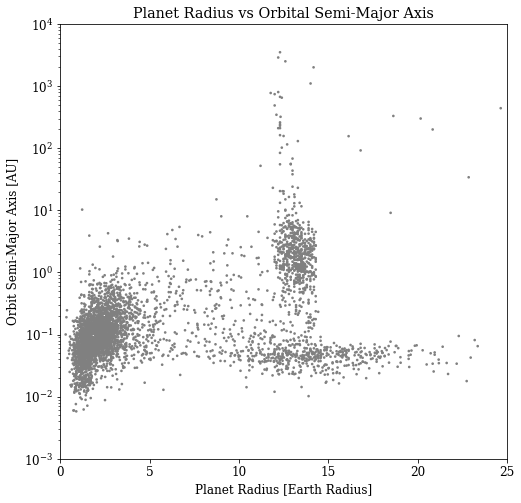

In [322]:
pl_osa = data[data.columns[5]]

#f = InitializePlot()
f = InitializePlot('linear', 'log', 0, 25, 10**-3, 10**4, 'Planet Radius [Earth Radius]', 'Orbit Semi-Major Axis [AU]')

plt.scatter(pl_r, pl_osa, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Orbital Semi-Major Axis')

plt.savefig("Planet Radius vs Orbital Semi-Major Axis.jpg")

#feedback: show sensitivity of semi-major axis data (mostly jupital-type exoplanets), radial velocity

<Figure size 432x288 with 0 Axes>

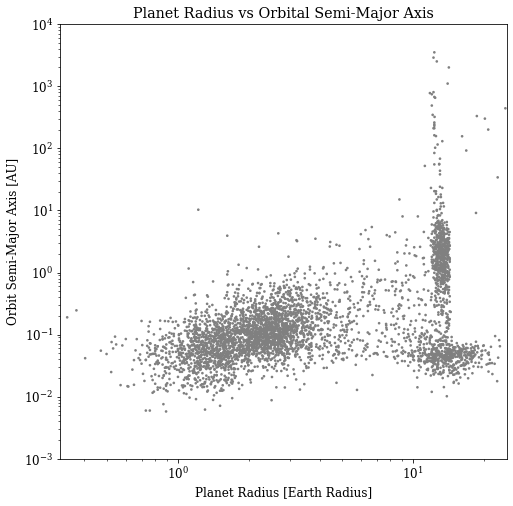

In [323]:
pl_osa = data[data.columns[5]]

#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-0.5, 25, 10**-3, 10**4, 'Planet Radius [Earth Radius]', 'Orbit Semi-Major Axis [AU]')

plt.scatter(pl_r, pl_osa, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Orbital Semi-Major Axis')

plt.savefig("Planet Radius vs Orbital Semi-Major Axis - log scale.jpg")

#feedback: show sensitivity of semi-major axis data (mostly jupital-type exoplanets), radial velocity

In [324]:
data[data.columns[5]].describe()

count    4274.000000
mean        5.468233
std        91.759600
min         0.004400
25%         0.053000
50%         0.102700
75%         0.269525
max      3500.000000
Name: Orbit Semi-Major Axis, dtype: float64

In [325]:
data[data.columns[6]].describe()

count    4408.000000
mean        5.702211
std         5.397148
min         0.296000
25%         1.750000
50%         2.730000
75%        11.967500
max        77.342000
Name: Planet Radius, dtype: float64

In [326]:
data[data.columns[8]].describe()

count     2806.000000
mean       363.496033
std       1243.498926
min          0.060000
25%         21.522500
50%         83.045000
75%        289.477500
max      44900.000000
Name: Insolation Flux, dtype: float64

In [327]:
#Planet Radius vs Orbital Period

<Figure size 432x288 with 0 Axes>

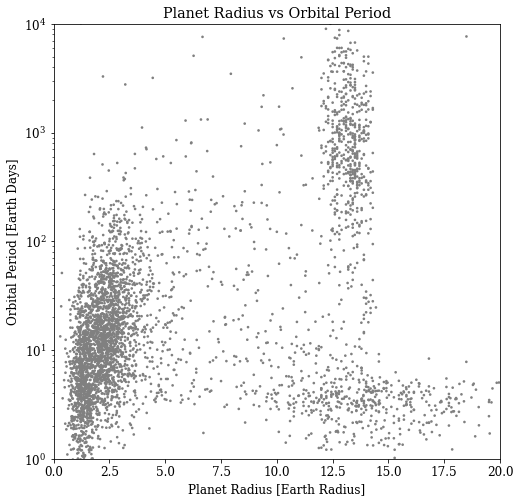

In [328]:
#f = InitializePlot()
f = InitializePlot('linear', 'log', 0, 20, 1, 10**4, 'Planet Radius [Earth Radius]', 'Orbital Period [Earth Days]')

plt.scatter(pl_r, pl_op, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Orbital Period')

plt.savefig("Planet Radius vs Orbital Period.jpg")

#transit, check detection method

<Figure size 432x288 with 0 Axes>

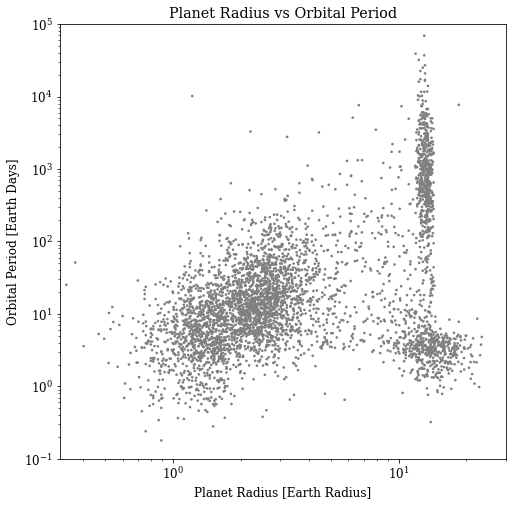

In [329]:
#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-0.5, 30, 10**-1, 10**5, 'Planet Radius [Earth Radius]', 'Orbital Period [Earth Days]')

plt.scatter(pl_r, pl_op, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Orbital Period')

plt.savefig("Planet Radius vs Orbital Period - log scale.jpg")

#transit, check detection method

<Figure size 432x288 with 0 Axes>

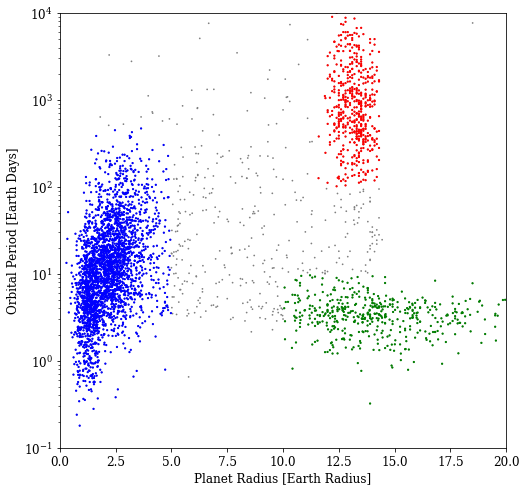

In [330]:
#group1: left bottom
group1 = (pl_r < 5) & (pl_op < 5*10**2)

#Plot Group 1 stars in blue on the plot and label that region 
f = InitializePlot('linear', 'log', 0, 20, 10**-1, 10**4, 'Planet Radius [Earth Radius]', 'Orbital Period [Earth Days]')
plt.scatter(pl_r, pl_op, c = 'gray', s = 3, edgecolors = 'none')
plt.scatter(pl_r[group1], pl_op[group1], c = 'blue', edgecolors = 'none', s = 5)
#plt.text(-0.5, 23.5, 'Group 1', color = 'blue', size = 16)

#Write a text file containing information for Group 1 stars by calling the
#WriteCatalog function on the stars that satisfy the Group 1 condition.

#WriteCatalog('..op_vs_plr_Group1.txt',
#             [data[data.columns[0]][group1], pl_method[group1], pl_r[group1], pl_op[group1], pl_m[group1], pl_osa[group1]],
#             'Pl_name Detection_method Pl_radius Pl_period Pl_mass osa')

#==============================================================
#group2: right top
group2 = (pl_r > 11.5) & (pl_r < 15) & (pl_op > 10**2)
plt.scatter(pl_r[group2], pl_op[group2], c = 'red', edgecolors = 'none', s = 5)
#plt.text(4, 22.8, 'Group 2', color = 'red', size = 16)

#WriteCatalog('op_vs_plr_Group2.txt',
#             [data[data.columns[0]][group2], pl_method[group2], pl_r[group2], pl_op[group2], pl_m[group2], pl_osa[group2]],
#             'Pl_name Detection_method Pl_radius Pl_period Pl_mass osa')

#==============================================================
#group3: right bottom
group3 = (pl_r > 10) & (pl_op < 10)
plt.scatter(pl_r[group3], pl_op[group3], c = 'green', edgecolors = 'none', s = 5)
#plt.text(6.5, 19.0, 'Group 3', color = 'green', size = 16)

#Write the catalog here when you're happy with your selection!
#WriteCatalog('op_vs_plr_Group3.txt',
#             [data[data.columns[0]][group3], pl_method[group3], pl_r[group3], pl_op[group3], pl_m[group3], pl_osa[group3]],
#             'Pl_name Detection_method Pl_radius Pl_period Pl_mass osa')

plt.savefig("Color Planet Radius vs .jpg")

<Figure size 432x288 with 0 Axes>

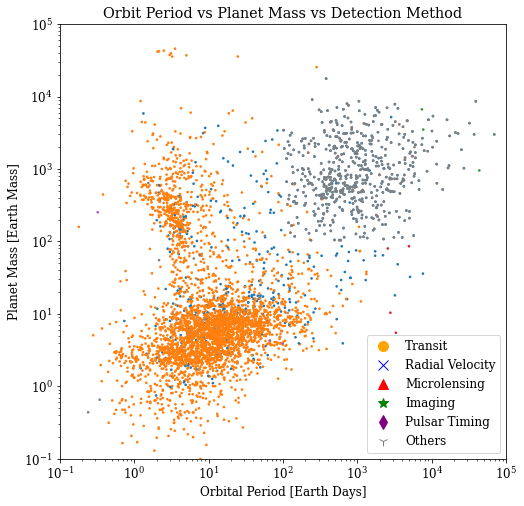

In [331]:
#graphing Orbital Period vs Planet Mass vs Detection Method
pl_op = data[data.columns[4]]
pl_m = data[data.columns[7]]

colors = {'Transit':'tab:orange', 'Radial Velocity':'tab:blue', 'Microlensing':'tab:red', 'Imaging':'tab:green', 'Pulsar Timing':'tab:purple', 'Transit Timing Variations':'tab:gray', 'Eclipse Timing Variations':'tab:gray', 'Orbital Brightness Modulation':'tab:gray', 'Pulsation Timing Variations':'tab:gray', 'Astrometry':'tab:gray', 'Disk Kinematics':'tab:gray'}
#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-1, 10**5, 10**-1, 10**5, 'Orbital Period [Earth Days]', 'Planet Mass [Earth Mass]')

plt.legend(handles=[orange, blue, red, green, purple, gray])

plt.scatter(pl_op, pl_m, c = data['Detection Method'].map(colors), s = 7, edgecolors = 'none')
plt.title('Orbit Period vs Planet Mass vs Detection Method')
plt.scatter(pl_op[group2], pl_m[group2], c = 'gray', s = 7, edgecolors = 'none')

<Figure size 432x288 with 0 Axes>

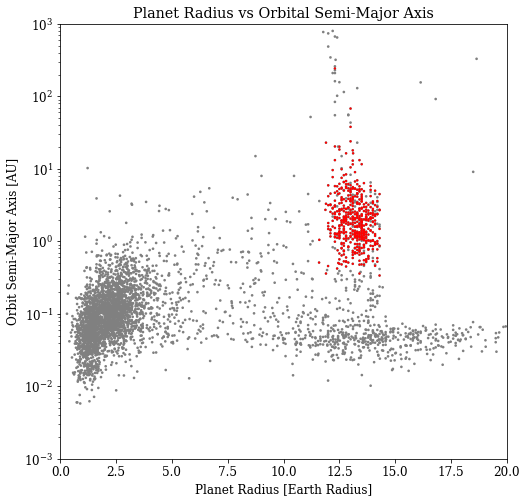

In [332]:
pl_osa = data[data.columns[5]]

#f = InitializePlot()
f = InitializePlot('linear', 'log', 0, 20, 10**-3, 10**3, 'Planet Radius [Earth Radius]', 'Orbit Semi-Major Axis [AU]')

plt.scatter(pl_r, pl_osa, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Orbital Semi-Major Axis')

plt.scatter(pl_r[group2], pl_osa[group2], c = 'red', edgecolors = 'none', s = 5)

<Figure size 432x288 with 0 Axes>

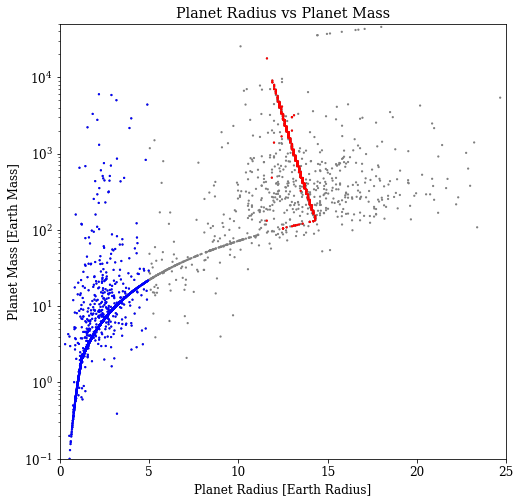

In [333]:
#f = InitializePlot()
f = InitializePlot('linear', 'log', 0, 25, 10**-1, 5*10**4, 'Planet Radius [Earth Radius]', 'Planet Mass [Earth Mass]')

plt.scatter(pl_r, pl_m, c = 'gray', s = 5, edgecolors = 'none')
plt.title('Planet Radius vs Planet Mass')

#Plot Group 1 stars in blue on the plot and label that region 
plt.scatter(pl_r[group1], pl_m[group1], c = 'blue', edgecolors = 'none', s = 5)
plt.scatter(pl_r[group2], pl_m[group2], c = 'red', edgecolors = 'none', s = 5)
#plt.scatter(pl_r[group3], pl_m[group3], c = 'green', edgecolors = 'none', s = 5)

<Figure size 432x288 with 0 Axes>

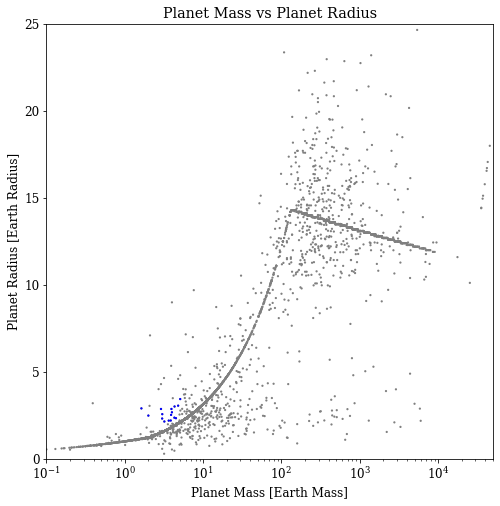

In [334]:
#f = InitializePlot()
f = InitializePlot('log', 'linear', 10**-1, 5*10**4, 0, 25, 'Planet Mass [Earth Mass]', 'Planet Radius [Earth Radius]')

plt.scatter(pl_m, pl_r, c = 'gray', s = 5, edgecolors = 'none')
plt.title('Planet Mass vs Planet Radius')

c1 = 1
c2 = 1
x1 = 5
x2 = 5
y1 = 3
y2 = 2

curve = (pl_m < 10**2) & (pl_r < c1*10**(pl_m-x1)+y1) & (pl_r > c2*10**(pl_m-x2)+y2)

#Plot Group 1 stars in blue on the plot and label that region 
plt.scatter(pl_m[curve], pl_r[curve], c = 'blue', edgecolors = 'none', s = 5)


In [335]:
#orbit semi-major axis^3 vs orbital period^2

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope          intercept    
    ----------------- ----------------
    91914.91234674846 661083.500497578
0.9976777623592232


<Figure size 432x288 with 0 Axes>

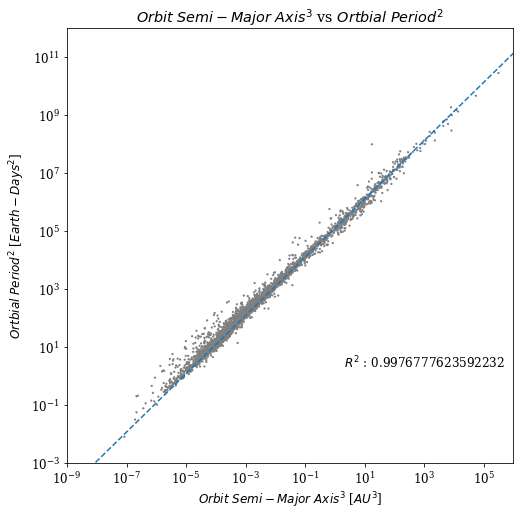

In [349]:
#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-9, 10**6, 10**-3, 10**12, '$Orbit$ $Semi-Major$ $Axis^3$ [$AU^3$]', '$Ortbial$ $Period^2$ [$Earth-Days^2$]')

x = pl_osa**3
y = pl_op**2


plt.scatter(x, y, c = 'gray', s = 5, edgecolors = 'none')
plt.title('$Orbit$ $Semi-Major$ $Axis^3$ vs $Ortbial$ $Period^2$')

new = (pl_osa**3 < 10**11) & (pl_osa**3 > 10**-7) & (pl_op**2 < 10**12) & (pl_op**2 > 10**-3)


osa = x[new]
op = y[new]
#print(osa)
#print(op)

model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, osa, op)
print(best_fit)

#plt.plot(osa, best_fit(osa), color='g', linewidth=1)



def abline(slope, intercept):
    #Plot a line from slope and intercept
    axes = plt.gca()
    x_vals = np.log(np.array(axes.get_xlim()))
    y_vals = intercept + slope * x_vals
    plt.plot(200000*x_vals, 200000*y_vals, '--')

abline(91914.91234674846,661083.500497578)  


correlation_matrix = np.corrcoef(osa, op)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.text(2, 2, "$R^2$ : " + str(r_squared), size = 12)

print(r_squared)

plt.savefig("Orbit Semi-Major Axis vs Ortbial Period.jpg")

#not linear, axis on logarithic scale

In [352]:
#outlier analysis

#Where condition to isolate main sequence stars
outlier = (pl_osa**3 > 10**1) & (pl_osa**3 < 10**2) & (pl_op**2 < 10**9) & (pl_op**2 > 10**7.5)
for i in range(len(outlier)):
    if outlier[i]:
        print(i, outlier[i])
        
data.iloc[68]
#iloc to access a row of data

68 True


Planet Name                      CFBDSIR J145829+101343 b
Host Name                          CFBDSIR J145829+101343
Number of Stars                                         1
Detection Method                                  Imaging
Orbital Period                                    10037.5
Orbit Semi-Major Axis                                 2.6
Planet Radius                                        12.4
Planet Mass                                        3337.1
Insolation Flux                                       NaN
Equilibrium Temperature                             370.0
Stellar Effective Temperature                       580.5
Stellar Radius                                        NaN
Stellar Mass                                         0.02
RA [degree]                                    224.620833
Dec [degree]                                    10.228611
Distance                                             23.1
Habitable Zone Flag                                  None
Name: 68, dtyp

In [354]:
print(2.6**3, 10037.5**2, 10**8)

17.576 100751406.25 100000000


In [338]:
#habitable zone analysis, histogram in relation to classification of exoplanets
print(data['Stellar Effective Temperature'].isnull().values.sum())
print(data['Stellar Radius'].isnull().values.sum())
print(data['Insolation Flux'].isnull().values.sum())
print(data['Orbit Semi-Major Axis'].isnull().values.sum())
print(data['Planet Radius'].isnull().values.sum())

116
134
1616
148
14


In [339]:
#test if exoplanet's semi-major axis is within the optimistic habitable zone range and return the boolean value of this
def hz_limit(steff, sradius, osa):
    #sorting out NaN data
    if math.isnan(steff) or math.isnan(sradius) or math.isnan(osa):
        return None
    
    #steff: Stellar Effective Temperature in K
    #sradius: Stellar Radius in Solar Radius
    #osa: orbital semi-major axis
    steff = int(steff)
    sradius = float(sradius)
    
    name = ['Recent Venus', 'Runaway Greenhouse', 'Moist Greenhouse', 'Maximum Greenhouse', 'Early Mars']
    seffsun = [1.776, 1.0512, 1.014, 0.345, 0.318]
    a = [1.4316e-4, 1.3242e-4, 8.1774e-5, 5.8942e-5, 5.4513e-5]
    b = [2.9875e-9, 1.5418e-8, 1.7063e-9, 1.6558e-9, 1.5313e-9, 1.404e-8]
    c = [-7.5702e-12, -7.9895e-12, -4.3241e-12, -3.0045e-12, -2.7786e-12]
    d = [-1.1635e-15, -1.8328e-15, -6.6462e-16, -5.2983e-16, -4.8997e-16]

    #https://www.omnicalculator.com/physics/luminosity
    lum = (sradius**2)*((steff/5780)**4)
    #print(lum)
    #lum = the luminosity of the star compared to the Sun ( L/L⊙ )

    t = steff - 5780

    hz = [0, 0, 0, 0, 0]
    seff = [0, 0, 0, 0, 0]
    for i in range(5):
        temp = seffsun[i] + a[i]*t + b[i]*(t**2) + c[i]*(t**3) + d[i]*(t**4)
        seff[i] = temp
    
    for i in range(5):
        temp = (lum/seff[i])**0.5
        hz[i] = temp
        
    #for i in range(5):
    #    print(name[i] + ": " + str(hz[i]) + " AU") #hz in AU
        
    opt_limit = [hz[0], hz[4]]
    
    if hz[0] <= osa and osa <= hz[4]:
        return True
    else:
        return False
    
    #print(opt_limit)
        
#Optimistic hz limits: wider -> more suitable
# Inner HZ: Recent Venus Limit
# Outer HZ: Early Mars Limit

In [340]:
print(hz_limit(4742.0,19.00,10))
#print(int(data['Stellar Effective Temperature'][0]))
print(hz_limit(data['Stellar Effective Temperature'][10], data['Stellar Radius'][10], data['Orbit Semi-Major Axis'][10]))

True
None


In [341]:
hz_flag = []

for i in range(len(data['Stellar Effective Temperature'])):
    flag = hz_limit(data['Stellar Effective Temperature'][i], data['Stellar Radius'][i], data['Orbit Semi-Major Axis'][i])
    hz_flag.append(flag)
    
#print(hz_flag)

data['Habitable Zone Flag'] = hz_flag

data.head()

,Planet Name,Host Name,Number of Stars,Detection Method,Orbital Period,Orbit Semi-Major Axis,Planet Radius,Planet Mass,Insolation Flux,Equilibrium Temperature,Stellar Effective Temperature,Stellar Radius,Stellar Mass,RA [degree],Dec [degree],Distance,Habitable Zone Flag
0,11 Com b,11 Com,2,Radial Velocity,326.03000,1.29,12.1,6165.6000,NaN,NaN,4742.0,19.00,2.70,185.178779,17.793252,93.1846,False
1,11 UMi b,11 UMi,1,Radial Velocity,516.21997,1.53,12.3,4684.8142,NaN,NaN,4213.0,29.79,2.78,229.274595,71.823943,125.3210,False
2,14 And b,14 And,1,Radial Velocity,185.84000,0.83,12.9,1525.5000,NaN,NaN,4813.0,11.00,2.20,352.824150,39.235837,75.4392,False
3,14 Her b,14 Her,1,Radial Velocity,1773.40002,2.93,12.9,1481.0878,NaN,NaN,5338.0,0.93,0.90,242.602101,43.816362,17.9323,False
4,16 Cyg B b,16 Cyg B,3,Radial Velocity,798.50000,1.66,13.5,565.7374,NaN,NaN,5750.0,1.13,1.08,295.465642,50.516824,21.1397,True


In [342]:
#writing the modified data with hz_flag included -> to_csv
#data.to_csv('modified exoplanet data.csv', index=False, na_rep='Unknown')
#data.to_csv('modified exoplanet data.csv', index=False)
#data.to_csv('exoplanet data with HZ.csv')

In [343]:
#frequencey of hz_flag boolean value
data['Habitable Zone Flag'].value_counts()

False    3909
True      230
Name: Habitable Zone Flag, dtype: int64

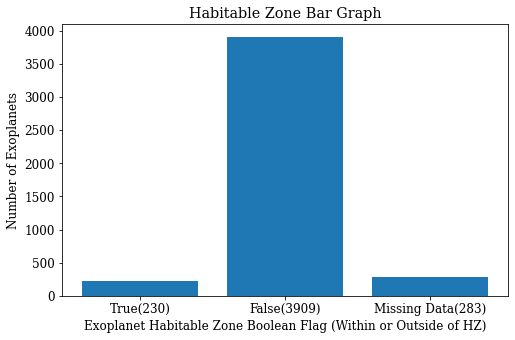

In [344]:
#Exoplanets Within Habitable Zone, Exoplanets Outside of Habitable Zone

plt.figure(figsize=(8,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Habitable Zone Boolean Flag (Within or Outside of HZ)")
plt.ylabel("Number of Exoplanets")
x = np.arange(3)
plt.bar(x, height=[230,3909,283])
plt.xticks(x, ['True(230)','False(3909)','Missing Data(283)'])
plt.title("Habitable Zone Bar Graph")
plt.savefig("Habitable Zone Bar Graph.jpg")

In [345]:
#Exoplanet Classification Analysis: Rocky, Super-Earths, Sub-Neptunes, Sub-Jovians, Jovians

In [97]:
def exo_classify(pl_radi):
    #pl_radi: planet radius in Earth radius
    if (pl_radi >= 0.5) & (pl_radi <= 1.0):
        return 'Rocky'
    elif (pl_radi > 1.0) & (pl_radi <= 1.75):
        return 'Super Earths'
    elif (pl_radi > 1.75) & (pl_radi <= 3.5):
        return 'sub-Neptunes'
    elif (pl_radi > 3.5) & (pl_radi <= 6.0):
        return 'sub-Jovians'
    elif (pl_radi > 6.0) & (pl_radi <= 14.3):
        return 'Jovians'
    else:
        return None

In [98]:
pl_class = []

for i in range(len(data['Planet Radius'])):
    temp = exo_classify(data['Planet Radius'][i])
    pl_class.append(temp)
    
#print(hz_flag)

data['Planet Classification'] = pl_class

data.head()

,Planet Name,Host Name,Number of Stars,Detection Method,Orbital Period,Orbit Semi-Major Axis,Planet Radius,Planet Mass,Insolation Flux,Equilibrium Temperature,Stellar Effective Temperature,Stellar Radius,Stellar Mass,RA [degree],Dec [degree],Distance,Habitable Zone Flag,Planet Classification
0,11 Com b,11 Com,2,Radial Velocity,326.03000,1.29,12.1,6165.6000,NaN,NaN,4742.0,19.00,2.70,185.178779,17.793252,93.1846,False,Jovians
1,11 UMi b,11 UMi,1,Radial Velocity,516.21997,1.53,12.3,4684.8142,NaN,NaN,4213.0,29.79,2.78,229.274595,71.823943,125.3210,False,Jovians
2,14 And b,14 And,1,Radial Velocity,185.84000,0.83,12.9,1525.5000,NaN,NaN,4813.0,11.00,2.20,352.824150,39.235837,75.4392,False,Jovians
3,14 Her b,14 Her,1,Radial Velocity,1773.40002,2.93,12.9,1481.0878,NaN,NaN,5338.0,0.93,0.90,242.602101,43.816362,17.9323,False,Jovians
4,16 Cyg B b,16 Cyg B,3,Radial Velocity,798.50000,1.66,13.5,565.7374,NaN,NaN,5750.0,1.13,1.08,295.465642,50.516824,21.1397,True,Jovians


In [99]:
data.to_csv('exoplanet data with HZ and Classification.csv')

In [100]:
data['Planet Classification'].value_counts()

sub-Neptunes    1550
Jovians         1199
Super Earths     941
sub-Jovians      326
Rocky            164
Name: Planet Classification, dtype: int64

Rocky: 2
Super Earths: 23
sub-Neptunes: 55
sub-Jovians: 20
Jovians: 130
Null: 0


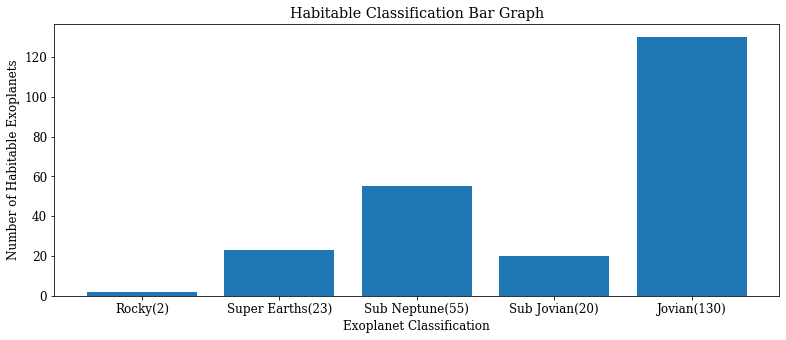

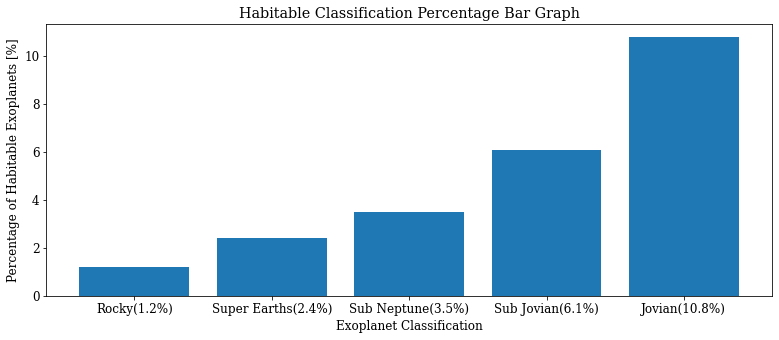

In [229]:
#habitable-zone exoplanet classificati
hz_type = []
for i in range(len(data['Planet Classification'])):
    if data['Habitable Zone Flag'][i] == True:
        hz_type.append(data['Planet Classification'][i])

rocky = 0
se = 0
sn = 0
sj = 0
j = 0
null = 0
#Exoplanet Classification Analysis: Rocky, Super-Earths, Sub-Neptunes, Sub-Jovians, Jovians
for exo in hz_type:
    if exo == 'Rocky':
        rocky+=1
    elif exo == 'Super Earths':
        se+=1
    elif exo == 'sub-Neptunes':
        sn+=1
    elif exo == 'sub-Jovians':
        sj+=1
    elif exo == 'Jovians':
        j+=1
    else:
        null+=1
        

print("Rocky: " + str(rocky) + "\n" +
     "Super Earths: " + str(se) + "\n" +
     "sub-Neptunes: " + str(sn) + "\n" +
     "sub-Jovians: " + str(sj) + "\n" +
     "Jovians: " + str(j) + "\n" +
     "Null: " + str(null))

plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Classification")
plt.ylabel("Number of Habitable Exoplanets")
x = np.arange(5)
plt.bar(x, height=[2,23,55,20,130])
plt.xticks(x, ['Rocky(2)','Super Earths(23)','Sub Neptune(55)', 'Sub Jovian(20)','Jovian(130)'])
plt.title("Habitable Classification Bar Graph")
plt.savefig("Habitable Classification Bar Graph.jpg")


sN = 100*55/1550
Jovians = 100*130/1199
Super_Earths = 23*100/941
sub_Jovians = 20*100/326
Rocky = 2*100/164

plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Classification")
plt.ylabel("Percentage of Habitable Exoplanets [%]")
x = np.arange(5)
plt.bar(x, height=[1.2,2.4,3.5,6.1,10.8])
plt.xticks(x, ['Rocky(1.2%)','Super Earths(2.4%)','Sub Neptune(3.5%)', 'Sub Jovian(6.1%)','Jovian(10.8%)'])
plt.title("Habitable Classification Percentage Bar Graph")
plt.savefig("Habitable Classification Percentage Bar Graph.jpg")

<Figure size 432x288 with 0 Axes>

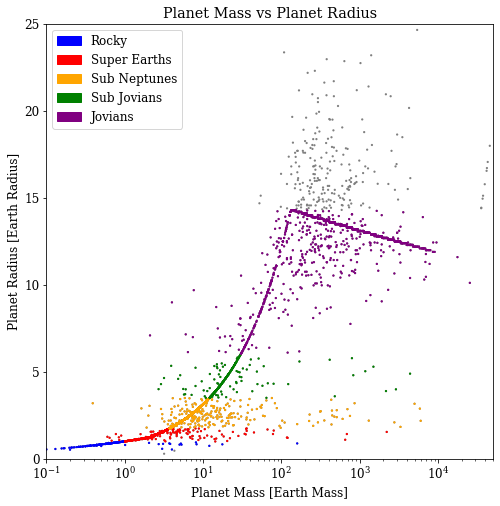

In [102]:
#f = InitializePlot()
f = InitializePlot('log', 'linear', 10**-1, 5*10**4, 0, 25, 'Planet Mass [Earth Mass]', 'Planet Radius [Earth Radius]')

plt.scatter(pl_m, pl_r, c = 'gray', s = 5, edgecolors = 'none')
plt.title('Planet Mass vs Planet Radius')

rocky = (data['Planet Classification'] == 'Rocky')
se = (data['Planet Classification'] == 'Super Earths')
sn = (data['Planet Classification'] == 'sub-Neptunes')
sj = (data['Planet Classification'] == 'sub-Jovians')
j = (data['Planet Classification'] == 'Jovians')

#Plot Group 1 stars in blue on the plot and label that region 
plt.scatter(pl_m[rocky], pl_r[rocky], c = 'blue', edgecolors = 'none', s = 5)
plt.scatter(pl_m[se], pl_r[se], c = 'red', edgecolors = 'none', s = 5)
plt.scatter(pl_m[sn], pl_r[sn], c = 'orange', edgecolors = 'none', s = 5)
plt.scatter(pl_m[sj], pl_r[sj], c = 'green', edgecolors = 'none', s = 5)
plt.scatter(pl_m[j], pl_r[j], c = 'purple', edgecolors = 'none', s = 5)

#legend
b = mpatches.Patch(color='blue', label='Rocky')
r = mpatches.Patch(color='red', label='Super Earths')
o = mpatches.Patch(color='orange', label='Sub Neptunes')
g = mpatches.Patch(color='green', label='Sub Jovians')
p = mpatches.Patch(color='purple', label='Jovians')

plt.legend(handles=[b, r, o, g, p])

plt.savefig("pl_mass vs pl_radius vs classification (log).jpg")

count      4400.000000
mean        473.187973
std        4148.446553
min           0.020000
25%           3.930000
50%           8.500000
75%         171.628200
max      239000.000000
Name: Planet Mass, dtype: float64
count    4408.000000
mean        5.702211
std         5.397148
min         0.296000
25%         1.750000
50%         2.730000
75%        11.967500
max        77.342000
Name: Planet Radius, dtype: float64


<Figure size 432x288 with 0 Axes>

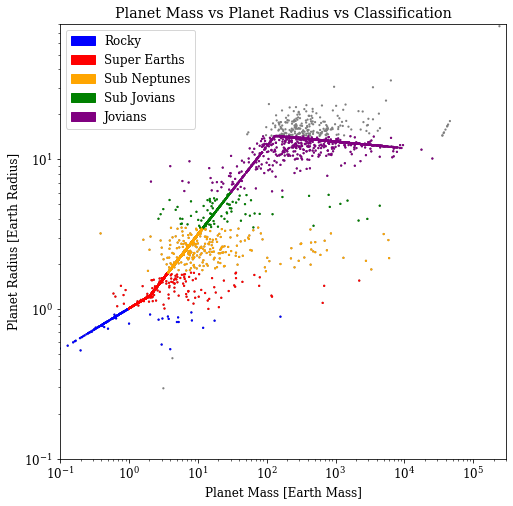

In [103]:
#f = InitializePlot()
f = InitializePlot('log', 'log', 0.1, 3*10**5, 0.1, 80, 'Planet Mass [Earth Mass]', 'Planet Radius [Earth Radius]')

plt.scatter(pl_m, pl_r, c = 'gray', s = 5, edgecolors = 'none')
plt.title('Planet Mass vs Planet Radius vs Classification')

rocky = (data['Planet Classification'] == 'Rocky')
se = (data['Planet Classification'] == 'Super Earths')
sn = (data['Planet Classification'] == 'sub-Neptunes')
sj = (data['Planet Classification'] == 'sub-Jovians')
j = (data['Planet Classification'] == 'Jovians')

#Plot Group 1 stars in blue on the plot and label that region 
plt.scatter(pl_m[rocky], pl_r[rocky], c = 'blue', edgecolors = 'none', s = 5)
plt.scatter(pl_m[se], pl_r[se], c = 'red', edgecolors = 'none', s = 5)
plt.scatter(pl_m[sn], pl_r[sn], c = 'orange', edgecolors = 'none', s = 5)
plt.scatter(pl_m[sj], pl_r[sj], c = 'green', edgecolors = 'none', s = 5)
plt.scatter(pl_m[j], pl_r[j], c = 'purple', edgecolors = 'none', s = 5)

#legend
b = mpatches.Patch(color='blue', label='Rocky')
r = mpatches.Patch(color='red', label='Super Earths')
o = mpatches.Patch(color='orange', label='Sub Neptunes')
g = mpatches.Patch(color='green', label='Sub Jovians')
p = mpatches.Patch(color='purple', label='Jovians')

plt.legend(handles=[b, r, o, g, p])

print(pl_m.describe())
print(pl_r.describe())


plt.savefig("pl_mass vs pl_radius vs classification (linear).jpg")

<Figure size 432x288 with 0 Axes>

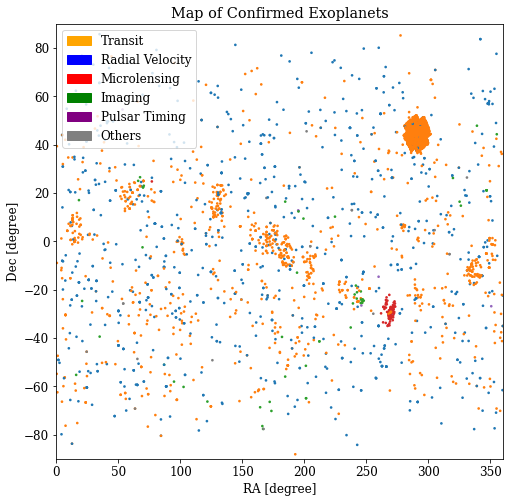

In [379]:
#map of current exoplanets
#RA
pl_x = data["RA [degree]"]
#Dec
pl_y = data["Dec [degree]"]


f = InitializePlot('linear', 'linear', 0, 360, -90, 90, 'RA [degree]', 'Dec [degree]')

colors = {'Transit':'tab:orange', 'Radial Velocity':'tab:blue', 'Microlensing':'tab:red', 'Imaging':'tab:green', 'Pulsar Timing':'tab:purple', 'Transit Timing Variations':'tab:gray', 'Eclipse Timing Variations':'tab:gray', 'Orbital Brightness Modulation':'tab:gray', 'Pulsation Timing Variations':'tab:gray', 'Astrometry':'tab:gray', 'Disk Kinematics':'tab:gray'}
orange = mpatches.Patch(color='orange', label='Transit')
blue = mpatches.Patch(color='blue', label='Radial Velocity')
red = mpatches.Patch(color='red', label='Microlensing')
green = mpatches.Patch(color='green', label='Imaging')
purple = mpatches.Patch(color='purple', label='Pulsar Timing')
gray = mpatches.Patch(color='gray', label='Others')

plt.legend(handles=[orange, blue, red, green, purple, gray])

plt.scatter(pl_x, pl_y, c = data['Detection Method'].map(colors), s = 7, edgecolors = 'none')
plt.title('Map of Confirmed Exoplanets')

plt.savefig("map of exoplanets.jpg")

#print("RA" + "\n", data["RA [sexagesimal]"].describe())
#print("Dec" + "\n", data["Dec [degree]"].describe())

In [105]:
def exo_fluxClassify(pl_radi, flux):
    #pl_radi: planet radius in Earth radius
    if (pl_radi >= 0.5) & (pl_radi <= 1.0):
        if (flux > 1.0) & (flux <= 182):
            return 'Hot Rocky'
        elif (flux > 0.28) & (flux <= 1.0):
            return 'Warm Rocky'
        elif (flux > 0.0035) & (flux <= 0.28):
            return 'Cold Rocky'
        else:
            return 'Rocky'
    
    elif (pl_radi > 1.0) & (pl_radi <= 1.75):
        if (flux > 1.12) & (flux <= 187):
            return 'Hot Super Earths'
        elif (flux > 0.3) & (flux <= 1.12):
            return 'Warm Super Earths'
        elif (flux > 0.003) & (flux <= 0.3):
            return 'Cold Super Earths'
        else:
            return 'Super Earths'
        
    elif (pl_radi > 1.75) & (pl_radi <= 3.5):
        if (flux > 1.15) & (flux <= 188):
            return 'Hot Sub-Neptunes'
        elif (flux > 0.32) & (flux <= 1.15):
            return 'Warm Sub-Neptunes'
        elif (flux > 0.003) & (flux <= 0.32):
            return 'Cold Sub-Neptunes'
        else:
            return 'Sub-Neptunes'
        
    elif (pl_radi > 3.5) & (pl_radi <= 6.0):
        if (flux > 1.65) & (flux <= 220):
            return 'Hot Sub-Jovians'
        elif (flux > 0.45) & (flux <= 1.65):
            return 'Warm Sub-Jovians'
        elif (flux > 0.003) & (flux <= 0.45):
            return 'Cold Sub-Jovians'
        else:
            return 'Sub-Jovians'
        
    elif (pl_radi > 6.0) & (pl_radi <= 14.3):
        if (flux > 1.65) & (flux <= 220):
            return 'Hot Jovians'
        elif (flux > 0.4) & (flux <= 1.65):
            return 'Warm Jovians'
        elif (flux > 0.0025) & (flux <= 0.4):
            return 'Cold Jovians'
        else:
            return 'Jovians'

    else:
        return None

In [106]:
pl_detclass = []

for i in range(len(data['Planet Radius'])):
    temp = exo_fluxClassify(data['Planet Radius'][i], data['Insolation Flux'][i])
    pl_detclass.append(temp)
    

data['Planet Type'] = pl_detclass

data.head()

,Planet Name,Host Name,Number of Stars,Detection Method,Orbital Period,Orbit Semi-Major Axis,Planet Radius,Planet Mass,Insolation Flux,Equilibrium Temperature,Stellar Effective Temperature,Stellar Radius,Stellar Mass,RA [degree],Dec [degree],Distance,Habitable Zone Flag,Planet Classification,Planet Type
0,11 Com b,11 Com,2,Radial Velocity,326.03000,1.29,12.1,6165.6000,NaN,NaN,4742.0,19.00,2.70,185.178779,17.793252,93.1846,False,Jovians,Jovians
1,11 UMi b,11 UMi,1,Radial Velocity,516.21997,1.53,12.3,4684.8142,NaN,NaN,4213.0,29.79,2.78,229.274595,71.823943,125.3210,False,Jovians,Jovians
2,14 And b,14 And,1,Radial Velocity,185.84000,0.83,12.9,1525.5000,NaN,NaN,4813.0,11.00,2.20,352.824150,39.235837,75.4392,False,Jovians,Jovians
3,14 Her b,14 Her,1,Radial Velocity,1773.40002,2.93,12.9,1481.0878,NaN,NaN,5338.0,0.93,0.90,242.602101,43.816362,17.9323,False,Jovians,Jovians
4,16 Cyg B b,16 Cyg B,3,Radial Velocity,798.50000,1.66,13.5,565.7374,NaN,NaN,5750.0,1.13,1.08,295.465642,50.516824,21.1397,True,Jovians,Jovians


In [107]:
data['Planet Classification'].value_counts()

sub-Neptunes    1550
Jovians         1199
Super Earths     941
sub-Jovians      326
Rocky            164
Name: Planet Classification, dtype: int64

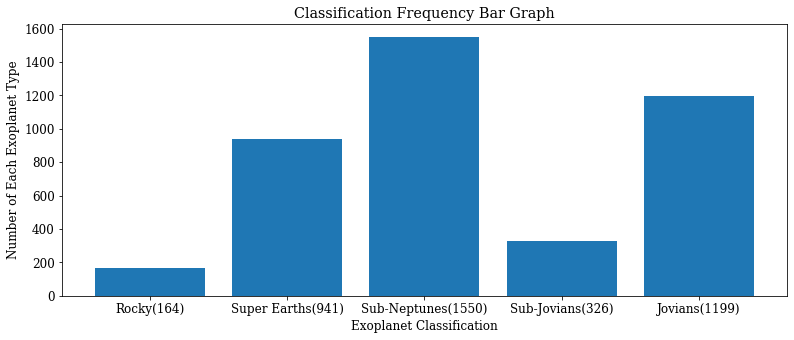

In [355]:
plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Classification")
plt.ylabel("Number of Each Exoplanet Type")
x = np.arange(5)
plt.bar(x, height=[164,941,1550,326,1199])
plt.xticks(x, ['Rocky(164)','Super Earths(941)','Sub-Neptunes(1550)','Sub-Jovians(326)','Jovians(1199)'])
plt.title("Classification Frequency Bar Graph")
plt.savefig("Classification Bar Graph.jpg")

In [109]:
data['Planet Type'].value_counts()

Jovians              1072
Hot Sub-Neptunes     1036
Super Earths          494
Sub-Neptunes          488
Hot Super Earths      429
Hot Sub-Jovians       166
Sub-Jovians           150
Hot Jovians           118
Rocky                 105
Hot Rocky              57
Warm Sub-Neptunes      22
Warm Super Earths      14
Warm Sub-Jovians        7
Cold Jovians            6
Cold Sub-Neptunes       4
Cold Super Earths       4
Cold Sub-Jovians        3
Warm Jovians            3
Warm Rocky              1
Cold Rocky              1
Name: Planet Type, dtype: int64

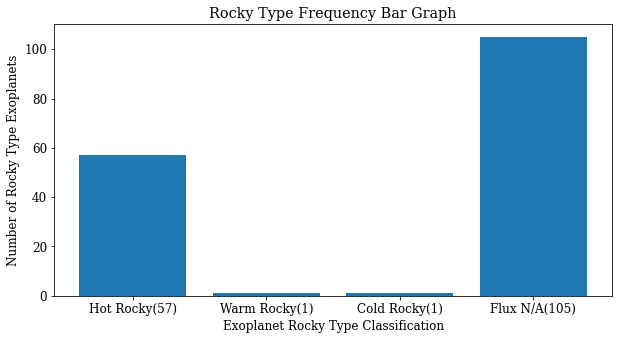

In [110]:
plt.figure(figsize=(10,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Rocky Type Classification")
plt.ylabel("Number of Rocky Type Exoplanets")
x = np.arange(4)
plt.bar(x, height=[57,1,1, 105])
plt.xticks(x, ['Hot Rocky(57)','Warm Rocky(1)','Cold Rocky(1)', 'Flux N/A(105)'])
plt.title("Rocky Type Frequency Bar Graph")
plt.savefig("Rocky Bar Graph.jpg")

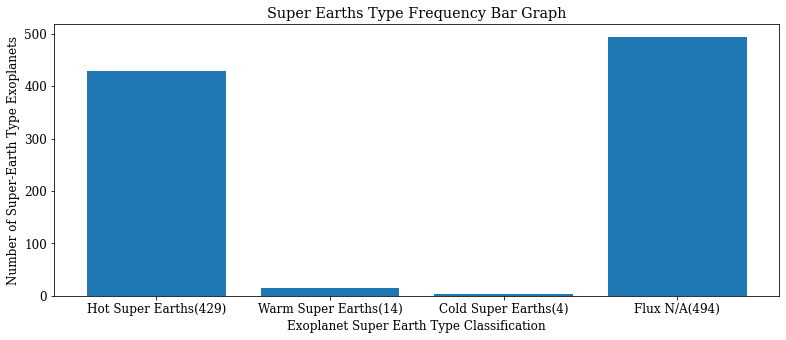

In [111]:
plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Super Earth Type Classification")
plt.ylabel("Number of Super-Earth Type Exoplanets")
x = np.arange(4)
plt.bar(x, height=[429,14,4, 494])
plt.xticks(x, ['Hot Super Earths(429)','Warm Super Earths(14)','Cold Super Earths(4)', 'Flux N/A(494)'])
plt.title("Super Earths Type Frequency Bar Graph")
plt.savefig("Super Earths Bar Graph.jpg")

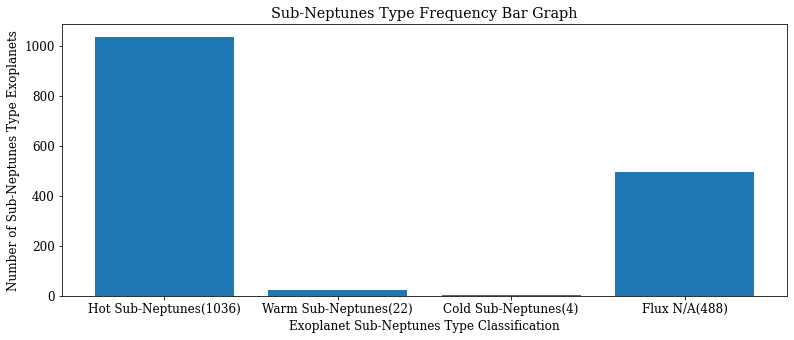

In [112]:
plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Sub-Neptunes Type Classification")
plt.ylabel("Number of Sub-Neptunes Type Exoplanets")
x = np.arange(4)
plt.bar(x, height=[1036,22,4, 494])
plt.xticks(x, ['Hot Sub-Neptunes(1036)','Warm Sub-Neptunes(22)','Cold Sub-Neptunes(4)', 'Flux N/A(488)'])
plt.title("Sub-Neptunes Type Frequency Bar Graph")
plt.savefig("Sub-Neptunes Bar Graph.jpg")

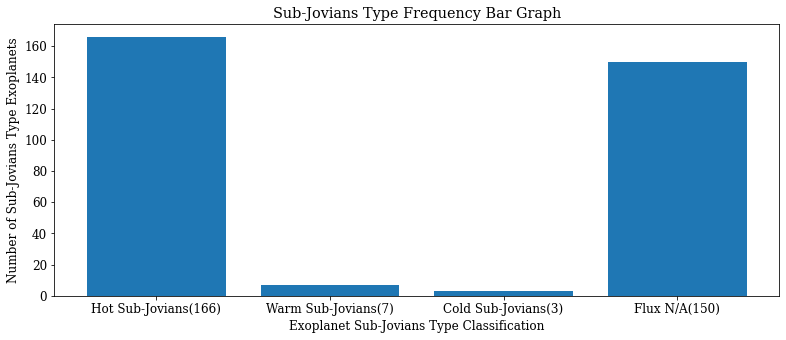

In [113]:
plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Sub-Jovians Type Classification")
plt.ylabel("Number of Sub-Jovians Type Exoplanets")
x = np.arange(4)
plt.bar(x, height=[166,7,3, 150])
plt.xticks(x, ['Hot Sub-Jovians(166)','Warm Sub-Jovians(7)','Cold Sub-Jovians(3)', 'Flux N/A(150)'])
plt.title("Sub-Jovians Type Frequency Bar Graph")
plt.savefig("Sub-Jovians Bar Graph.jpg")

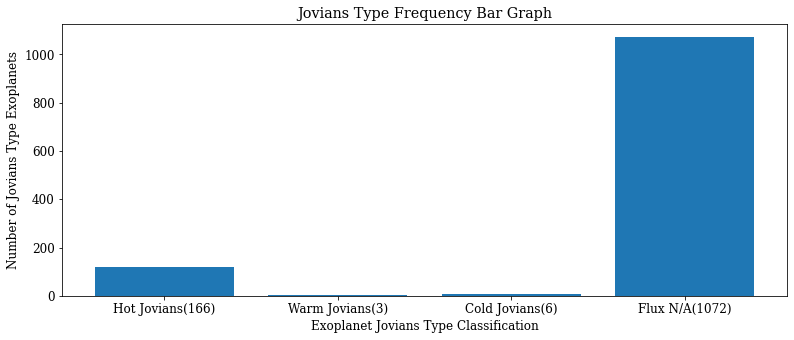

In [114]:
plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Jovians Type Classification")
plt.ylabel("Number of Jovians Type Exoplanets")
x = np.arange(4)
plt.bar(x, height=[118,3,6, 1072])
plt.xticks(x, ['Hot Jovians(166)','Warm Jovians(3)','Cold Jovians(6)', 'Flux N/A(1072)'])
plt.title("Jovians Type Frequency Bar Graph")
plt.savefig("Jovians Bar Graph.jpg")

In [115]:
#habitable-zone exoplanet classificati
hz_type = []
for i in range(len(data['Planet Classification'])):
    if data['Habitable Zone Flag'][i] == True:
        hz_type.append(data['Planet Type'][i])

rocky = 0
hrocky = 0
wrocky = 0
crocky = 0
        
se = 0
hse = 0
wse = 0
cse = 0

sn = 0
hsn = 0
wsn = 0
csn = 0

sj = 0
hsj = 0
wsj = 0
csj = 0

j = 0
hj = 0
wj = 0
cj = 0

null = 0

#Exoplanet Classification Analysis: Rocky, Super-Earths, Sub-Neptunes, Sub-Jovians, Jovians
for exo in hz_type:
    if exo == 'Rocky':
        rocky+=1
    elif exo == 'Hot Rocky':
        hrocky+=1
    elif exo == 'Warm Rocky':
        wrocky+=1
    elif exo == 'Cold Rocky':
        crocky+=1
        
    elif exo == 'Super Earths':
        se+=1
    elif exo == 'Hot Super Earths':
        hse+=1
    elif exo == 'Warm Super Earths':
        wse+=1
    elif exo == 'Cold Super Earths':
        cse+=1
        
    elif exo == 'Sub-Neptunes':
        sn+=1
    elif exo == 'Hot Sub-Neptunes':
        hsn+=1
    elif exo == 'Warm Sub-Neptunes':
        wsn+=1
    elif exo == 'Cold Sub-Neptunes':
        csn+=1
    
    elif exo == 'Sub-Jovians':
        sj+=1
    elif exo == 'Hot Sub-Jovians':
        hsj+=1
    elif exo == 'Warm Sub-Jovians':
        wsj+=1
    elif exo == 'Cold Sub-Jovians':
        csj+=1
        
    elif exo == 'Jovians':
        j+=1
    elif exo == 'Hot Jovians':
        hj+=1
    elif exo == 'Warm Jovians':
        wj+=1
    elif exo == 'Cold Jovians':
        cj+=1
    else:
        null+=1
        

print("Rocky: " + str(rocky) + "\n" +
      "Hot Rocky: " + str(hrocky) + "\n" +
      "Warm Rocky: " + str(wrocky) + "\n" +
      "Cold Rocky: " + str(crocky) + "\n" +
     "Super Earths: " + str(se) + "\n" +
      "Hot Super Earths: " + str(hse) + "\n" +
      "Warm Super Earths: " + str(wse) + "\n" +
      "Cold Super Earths: " + str(cse) + "\n" +
     "sub-Neptunes: " + str(sn) + "\n" +
      "Hot sub-Neptunes: " + str(hsn) + "\n" +
      "Warm sub-Neptunes: " + str(wsn) + "\n" +
      "Cold sub-Neptunes: " + str(csn) + "\n" +
     "sub-Jovians: " + str(sj) + "\n" +
      "Hot sub-Jovians: " + str(hsj) + "\n" +
      "Warm sub-Jovians: " + str(wsj) + "\n" +
      "Cold sub-Jovians: " + str(csj) + "\n" +
     "Jovians: " + str(j) + "\n" +
      "Hot Jovians: " + str(hj) + "\n" +
      "Warm Jovians: " + str(wj) + "\n" +
      "Cold Jovians: " + str(cj) + "\n" +
     "Null: " + str(null))

Rocky: 0
Hot Rocky: 1
Warm Rocky: 1
Cold Rocky: 0
Super Earths: 0
Hot Super Earths: 7
Warm Super Earths: 14
Cold Super Earths: 2
sub-Neptunes: 15
Hot sub-Neptunes: 18
Warm sub-Neptunes: 22
Cold sub-Neptunes: 0
sub-Jovians: 12
Hot sub-Jovians: 2
Warm sub-Jovians: 5
Cold sub-Jovians: 1
Jovians: 123
Hot Jovians: 4
Warm Jovians: 3
Cold Jovians: 0
Null: 0


In [298]:
a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5]
c = ['x', 'y', 'z']

t = QTable([a, b, c],
            names=('a', 'b', 'c'),
            meta={'name': 'first table'})


hot = 1036 + 42

plt.figure(figsize=(13,5))
mpl.rcParams['font.size']=12
plt.xlabel("Exoplanet Jovians Type Classification")
plt.ylabel("Number of Jovians Type Exoplanets")
x = np.arange(4)
plt.bar(x, height=[118,3,6, 1072])
plt.xticks(x, ['Hot(166)','Warm(3)','Cold(6)', 'Flux N/A(1072)'])
plt.title("Jovians Type Frequency Bar Graph")
plt.savefig("Jovians Bar Graph.jpg")



Jovians              1072

Hot Sub-Neptunes     1036

Super Earths          494
Sub-Neptunes          488
Hot Super Earths      429
Hot Sub-Jovians       166
Sub-Jovians           150
Hot Jovians           118
Rocky                 105
Hot Rocky              57
Warm Sub-Neptunes      22
Warm Super Earths      14
Warm Sub-Jovians        7
Cold Jovians            6
Cold Sub-Neptunes       4
Cold Super Earths       4
Cold Sub-Jovians        3
Warm Jovians            3
Warm Rocky              1
Cold Rocky              1


'\ncolors = {\'Transit\':\'tab:orange\', \'Radial Velocity\':\'tab:blue\', \n          \'Microlensing\':\'tab:red\', \'Imaging\':\'tab:green\', \n          \'Pulsar Timing\':\'tab:purple\', \'Transit Timing Variations\':\'tab:gray\', \n          \'Eclipse Timing Variations\':\'tab:gray\', \'Orbital Brightness Modulation\':\'tab:gray\', \n          \'Pulsation Timing Variations\':\'tab:gray\', \'Astrometry\':\'tab:gray\', \n          \'Disk Kinematics\':\'tab:gray\'}\norange = mpatches.Patch(color=\'orange\', label=\'Transit\')\nblue = mpatches.Patch(color=\'blue\', label=\'Radia Velocity\')\nred = mpatches.Patch(color=\'red\', label=\'Microlensing\')\ngreen = mpatches.Patch(color=\'green\', label=\'Imaging\')\npurple = mpatches.Patch(color=\'purple\', label=\'Pulsar Timing\')\ngray = mpatches.Patch(color=\'gray\', label=\'Others\')\n\nplt.legend(handles=[orange, blue, red, green, purple, gray])\n\nplt.scatter(pl_x, pl_y, c = data[\'Detection Method\'].map(colors), s = 7, edgecolors = \

<Figure size 432x288 with 0 Axes>

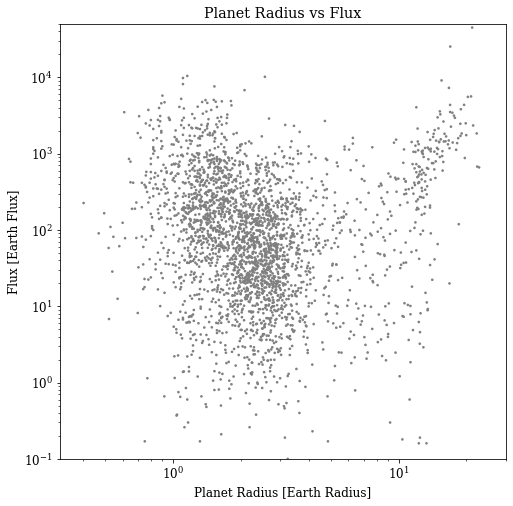

In [116]:
pl_r = data[data.columns[6]]
pl_flux = data[data.columns[8]]

#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-0.5, 30, 10**-1, 5*10**4, 'Planet Radius [Earth Radius]', 'Flux [Earth Flux]')


plt.scatter(pl_r, pl_flux, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Flux')

plt.savefig("Planet Radius vs Flux Color.jpg")

"""
colors = {'Transit':'tab:orange', 'Radial Velocity':'tab:blue', 
          'Microlensing':'tab:red', 'Imaging':'tab:green', 
          'Pulsar Timing':'tab:purple', 'Transit Timing Variations':'tab:gray', 
          'Eclipse Timing Variations':'tab:gray', 'Orbital Brightness Modulation':'tab:gray', 
          'Pulsation Timing Variations':'tab:gray', 'Astrometry':'tab:gray', 
          'Disk Kinematics':'tab:gray'}
orange = mpatches.Patch(color='orange', label='Transit')
blue = mpatches.Patch(color='blue', label='Radia Velocity')
red = mpatches.Patch(color='red', label='Microlensing')
green = mpatches.Patch(color='green', label='Imaging')
purple = mpatches.Patch(color='purple', label='Pulsar Timing')
gray = mpatches.Patch(color='gray', label='Others')

plt.legend(handles=[orange, blue, red, green, purple, gray])

plt.scatter(pl_x, pl_y, c = data['Detection Method'].map(colors), s = 7, edgecolors = 'none')
plt.title('Map of Confirmed Exoplanets')

plt.savefig("map of exoplanets.jpg")

#print("RA" + "\n", data["RA [sexagesimal]"].describe())
#print("Dec" + "\n", data["Dec [degree]"].describe())
"""

<Figure size 432x288 with 0 Axes>

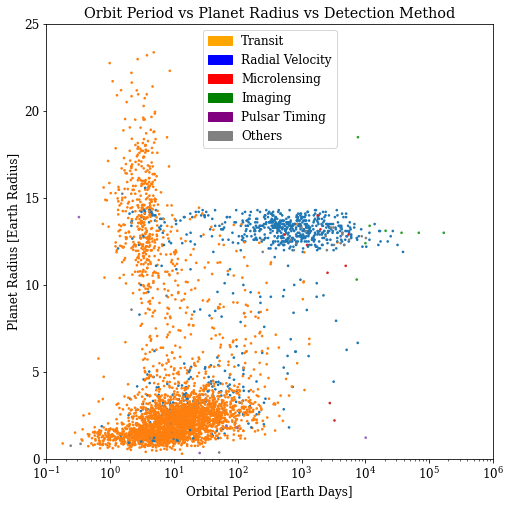

In [188]:
#graphing Orbital Period vs Planet Mass vs Detection Method
pl_op = data[data.columns[4]]
pl_m = data[data.columns[7]]

colors = {'Transit':'tab:orange', 'Radial Velocity':'tab:blue', 'Microlensing':'tab:red', 'Imaging':'tab:green', 'Pulsar Timing':'tab:purple', 'Transit Timing Variations':'tab:gray', 'Eclipse Timing Variations':'tab:gray', 'Orbital Brightness Modulation':'tab:gray', 'Pulsation Timing Variations':'tab:gray', 'Astrometry':'tab:gray', 'Disk Kinematics':'tab:gray'}
#f = InitializePlot()
f = InitializePlot('log', 'linear', 10**-1, 10**6, 0, 25, 'Orbital Period [Earth Days]', 'Planet Radius [Earth Radius]')

#legend
orange = mpatches.Patch(color='orange', label='Transit')
blue = mpatches.Patch(color='blue', label='Radial Velocity')
red = mpatches.Patch(color='red', label='Microlensing')
green = mpatches.Patch(color='green', label='Imaging')
purple = mpatches.Patch(color='purple', label='Pulsar Timing')
gray = mpatches.Patch(color='gray', label='Others')

plt.legend(handles=[orange, blue, red, green, purple, gray])

plt.scatter(pl_op, pl_r, c = data['Detection Method'].map(colors), s = 7, edgecolors = 'none')
plt.title('Orbit Period vs Planet Radius vs Detection Method')

plt.savefig("Orbit Period vs Planet Radius vs Detection Method.jpg")

In [119]:
s_et = data['Stellar Effective Temperature']
s_r = data['Stellar Radius']
s_et.describe()

count     4306.000000
mean      5460.513070
std       1809.769841
min        575.000000
25%       4976.000000
50%       5568.500000
75%       5908.000000
max      57000.000000
Name: Stellar Effective Temperature, dtype: float64

In [120]:
s_r.describe()

count    4288.000000
mean        1.531299
std         3.769607
min         0.010000
25%         0.790000
50%         0.960000
75%         1.260000
max        83.800000
Name: Stellar Radius, dtype: float64

"\n#Plot Group 1 stars in blue on the plot and label that region \nplt.scatter(pl_m[rocky], pl_r[rocky], c = 'blue', edgecolors = 'none', s = 5)\nplt.scatter(pl_m[se], pl_r[se], c = 'red', edgecolors = 'none', s = 5)\nplt.scatter(pl_m[sn], pl_r[sn], c = 'orange', edgecolors = 'none', s = 5)\nplt.scatter(pl_m[sj], pl_r[sj], c = 'green', edgecolors = 'none', s = 5)\nplt.scatter(pl_m[j], pl_r[j], c = 'purple', edgecolors = 'none', s = 5)\n\n#legend\nb = mpatches.Patch(color='blue', label='Rocky')\nr = mpatches.Patch(color='red', label='Super Earths')\no = mpatches.Patch(color='orange', label='Sub Neptunes')\ng = mpatches.Patch(color='green', label='Sub Jovians')\np = mpatches.Patch(color='purple', label='Jovians')\n\nplt.legend(handles=[b, r, o, g, p])\n\nprint(pl_m.describe())\nprint(pl_r.describe())\n"

<Figure size 432x288 with 0 Axes>

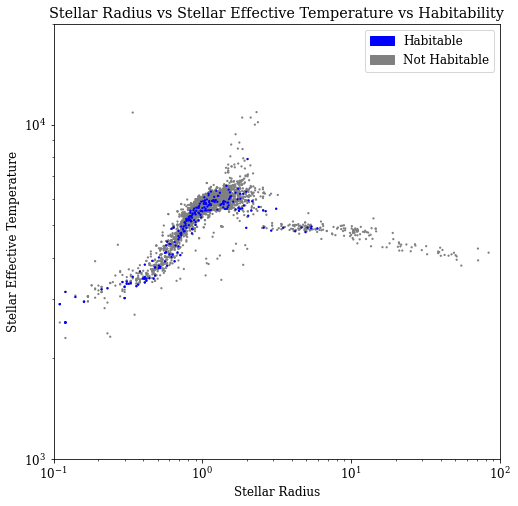

In [147]:
#f = InitializePlot()
x_axis = ""
y_axis = ""
"""
classification: radius, mass, osa
hz: stellar radius, stellar temperature, radius,
deteection method: RA vs Dec (location), periods (separation), radius (size)
"""
rocky = (data['Planet Classification'] == 'Rocky')
se = (data['Planet Classification'] == 'Super Earths')
sn = (data['Planet Classification'] == 'sub-Neptunes')
sj = (data['Planet Classification'] == 'sub-Jovians')
j = (data['Planet Classification'] == 'Jovians')

hz = (data['Habitable Zone Flag'] == True)

transit = (data['Detection Method'] == 'Transit')
rv = (data['Detection Method'] == 'Radial Velocity')
micro = (data['Detection Method'] == 'Microlensing')
img = (data['Detection Method'] == 'Imaging')
pulsar = (data['Detection Method'] == 'Pulsar Timing')

s_eff = data['Stellar Effective Temperature']
s_r = data['Stellar Radius']

f = InitializePlot('log', 'log', 0.1, 100, 10**3, 2*10**4, "Stellar Radius", "Stellar Effective Temperature")
plt.scatter(s_r, s_eff, c = 'gray', edgecolors = 'none', s = 5)
plt.title('Stellar Radius vs Stellar Effective Temperature vs Habitability')

plt.scatter(s_r[hz], s_eff[hz], c = 'blue', edgecolors = 'none', s = 5)

hz1 = mpatches.Patch(color='blue', label='Habitable')
hzX1 = mpatches.Patch(color='gray', label='Not Habitable')

plt.legend(handles=[hz1, hzX1])

"""
#Plot Group 1 stars in blue on the plot and label that region 
plt.scatter(pl_m[rocky], pl_r[rocky], c = 'blue', edgecolors = 'none', s = 5)
plt.scatter(pl_m[se], pl_r[se], c = 'red', edgecolors = 'none', s = 5)
plt.scatter(pl_m[sn], pl_r[sn], c = 'orange', edgecolors = 'none', s = 5)
plt.scatter(pl_m[sj], pl_r[sj], c = 'green', edgecolors = 'none', s = 5)
plt.scatter(pl_m[j], pl_r[j], c = 'purple', edgecolors = 'none', s = 5)

#legend
b = mpatches.Patch(color='blue', label='Rocky')
r = mpatches.Patch(color='red', label='Super Earths')
o = mpatches.Patch(color='orange', label='Sub Neptunes')
g = mpatches.Patch(color='green', label='Sub Jovians')
p = mpatches.Patch(color='purple', label='Jovians')

plt.legend(handles=[b, r, o, g, p])

print(pl_m.describe())
print(pl_r.describe())
"""

<Figure size 432x288 with 0 Axes>

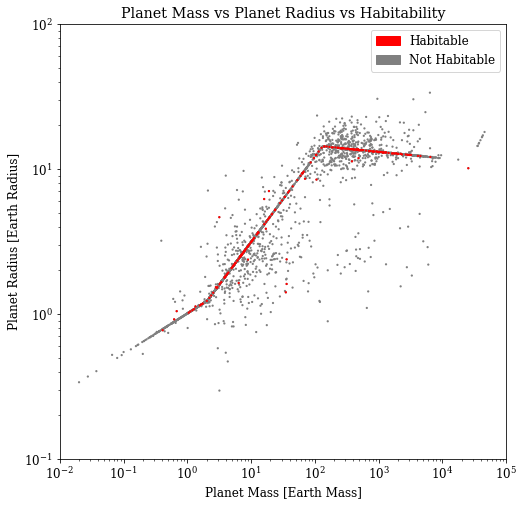

In [193]:
f = InitializePlot('log', 'log', 10**-2, 10**5, 10**-1, 10**2, "Planet Mass [Earth Mass]", "Planet Radius [Earth Radius]")
plt.scatter(pl_m, pl_r, c = 'gray', edgecolors = 'none', s = 5)
plt.title('Planet Mass vs Planet Radius vs Habitability')

plt.scatter(pl_m[hz], pl_r[hz], c = 'red', edgecolors = 'none', s = 5)

hz1 = mpatches.Patch(color='red', label='Habitable')
hzX1 = mpatches.Patch(color='gray', label='Not Habitable')

plt.legend(handles=[hz1, hzX1])

plt.savefig("Planet Mass vs Planet Radius vs Habitability.jpg")

In [158]:
#m/r
massRadiusRatio = []
massRadiusRatio = pl_m/pl_r
massRadiusRatio.describe()
pl_osa.describe()

count    4274.000000
mean        5.468233
std        91.759600
min         0.004400
25%         0.053000
50%         0.102700
75%         0.269525
max      3500.000000
Name: Orbit Semi-Major Axis, dtype: float64

<Figure size 432x288 with 0 Axes>

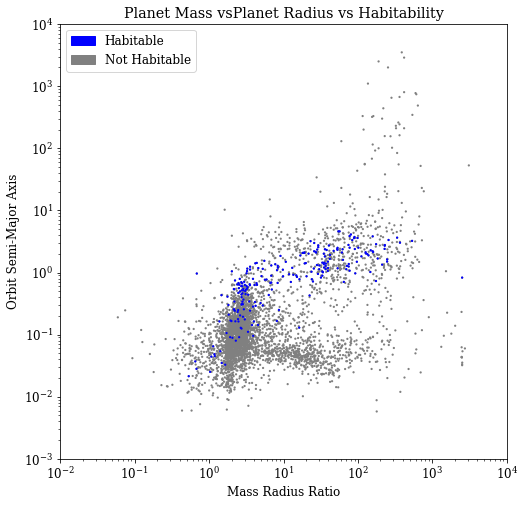

In [160]:
#m/r
massRadiusRatio = []
massRadiusRatio = pl_m/pl_r

f = InitializePlot('log', 'log', 10**-2, 10**4, 10**-3, 10**4, "Mass Radius Ratio", "Orbit Semi-Major Axis")
plt.scatter(massRadiusRatio, pl_osa, c = 'gray', edgecolors = 'none', s = 5)
plt.title('Planet Mass vsPlanet Radius vs Habitability')

plt.scatter(massRadiusRatio[hz], pl_osa[hz], c = 'blue', edgecolors = 'none', s = 5)

hz1 = mpatches.Patch(color='blue', label='Habitable')
hzX1 = mpatches.Patch(color='gray', label='Not Habitable')

plt.legend(handles=[hz1, hzX1])

In [161]:
flux = data["Insolation Flux"]
flux.describe()

count     2806.000000
mean       363.496033
std       1243.498926
min          0.060000
25%         21.522500
50%         83.045000
75%        289.477500
max      44900.000000
Name: Insolation Flux, dtype: float64

<Figure size 432x288 with 0 Axes>

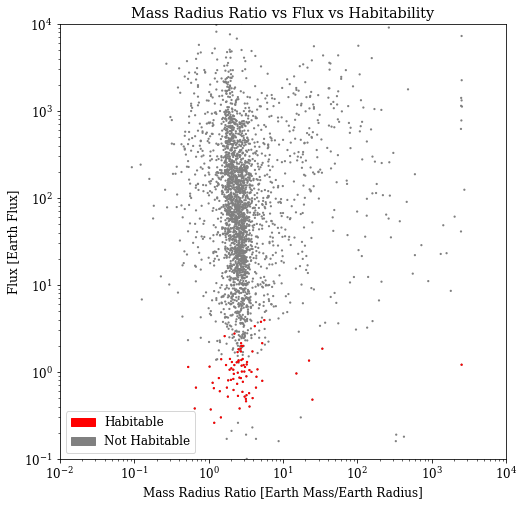

In [220]:
#m/r
massRadiusRatio = []
massRadiusRatio = pl_m/pl_r

f = InitializePlot('log', 'log', 10**-2, 10**4, 10**-1, 10**4, "Mass Radius Ratio [Earth Mass/Earth Radius]", "Flux [Earth Flux]")
plt.scatter(massRadiusRatio, flux, c = 'gray', edgecolors = 'none', s = 5)
plt.title('Mass Radius Ratio vs Flux vs Habitability')

plt.scatter(massRadiusRatio[hz], flux[hz], c = 'red', edgecolors = 'none', s = 5)

hz1 = mpatches.Patch(color='red', label='Habitable')
hzX1 = mpatches.Patch(color='gray', label='Not Habitable')

plt.legend(handles=[hz1, hzX1])
plt.savefig("Mass Radius Ratio vs Flux vs Habitability.jpg")

<Figure size 432x288 with 0 Axes>

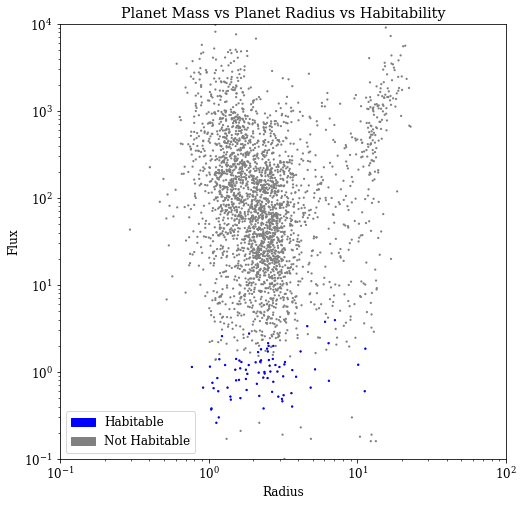

In [175]:
f = InitializePlot('log', 'log', 10**-1, 10**2, 10**-1, 10**4, "Radius", "Flux")
plt.scatter(pl_r, flux, c = 'gray', edgecolors = 'none', s = 5)
plt.title('Planet Mass vs Planet Radius vs Habitability')

plt.scatter(pl_r[hz], flux[hz], c = 'blue', edgecolors = 'none', s = 5)

hz1 = mpatches.Patch(color='blue', label='Habitable')
hzX1 = mpatches.Patch(color='gray', label='Not Habitable')

plt.legend(handles=[hz1, hzX1])

<Figure size 432x288 with 0 Axes>

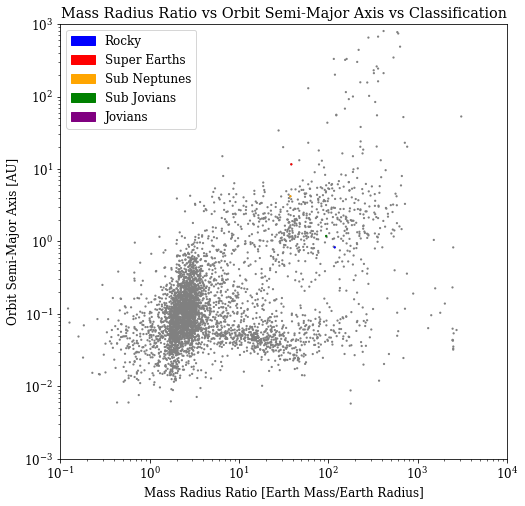

In [270]:
#m/r
massRadiusRatio = []
massRadiusRatio = pl_m/pl_r

f = InitializePlot('log', 'log', 10**-1, 10**4, 10**-3, 10**3, "Mass Radius Ratio [Earth Mass/Earth Radius]", "Orbit Semi-Major Axis [AU]")
plt.scatter(massRadiusRatio, pl_osa, c = 'gray', edgecolors = 'none', s = 5)
plt.title('Mass Radius Ratio vs Orbit Semi-Major Axis vs Classification')


#Plot Group 1 stars in blue on the plot and label that region 
plt.scatter(massRadiusRatio[rocky], pl_osa[rocky], c = 'blue', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[se], pl_osa[se], c = 'red', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[sn], pl_osa[sn], c = 'orange', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[sj], pl_osa[sj], c = 'green', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[j], pl_osa[j], c = 'purple', edgecolors = 'none', s = 5)




#legend
b = mpatches.Patch(color='blue', label='Rocky')
r = mpatches.Patch(color='red', label='Super Earths')
o = mpatches.Patch(color='orange', label='Sub Neptunes')
g = mpatches.Patch(color='green', label='Sub Jovians')
p = mpatches.Patch(color='purple', label='Jovians')

plt.legend(handles=[b, r, o, g, p])

plt.savefig("Mass Radius Ratio vs Orbit Semi-Major Axis vs Classification.jpg")

<Figure size 432x288 with 0 Axes>

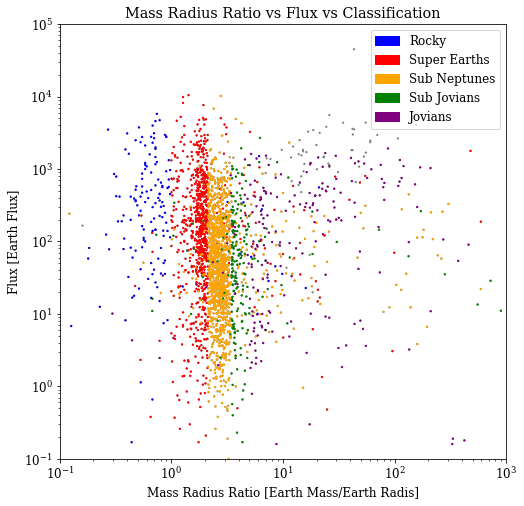

In [224]:
#m/r
massRadiusRatio = []
massRadiusRatio = pl_m/pl_r

f = InitializePlot('log', 'log', 10**-1, 10**3, 10**-1, 10**5, "Mass Radius Ratio [Earth Mass/Earth Radis]", "Flux [Earth Flux]")
plt.scatter(massRadiusRatio, flux, c = 'gray', edgecolors = 'none', s = 5)
plt.title('Mass Radius Ratio vs Flux vs Classification')


#Plot Group 1 stars in blue on the plot and label that region 
plt.scatter(massRadiusRatio[rocky], flux[rocky], c = 'blue', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[se], flux[se], c = 'red', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[sn], flux[sn], c = 'orange', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[sj], flux[sj], c = 'green', edgecolors = 'none', s = 5)
plt.scatter(massRadiusRatio[j], flux[j], c = 'purple', edgecolors = 'none', s = 5)

#legend
b = mpatches.Patch(color='blue', label='Rocky')
r = mpatches.Patch(color='red', label='Super Earths')
o = mpatches.Patch(color='orange', label='Sub Neptunes')
g = mpatches.Patch(color='green', label='Sub Jovians')
p = mpatches.Patch(color='purple', label='Jovians')

plt.legend(handles=[b, r, o, g, p])

plt.savefig("Mass Radius Ratio vs Flux vs Classification.jpg")

Text(0.5, 1.0, 'Planet Radius vs Flux')

<Figure size 432x288 with 0 Axes>

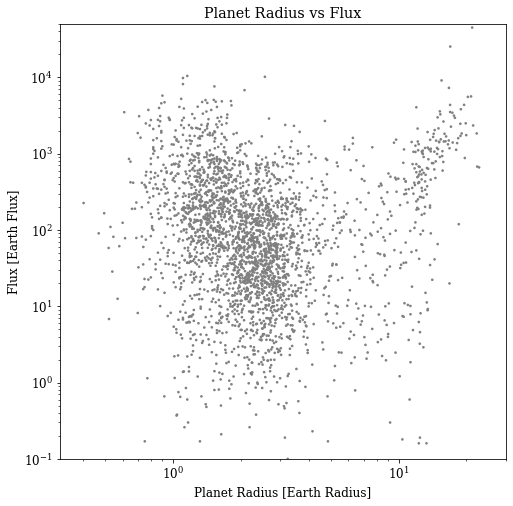

In [222]:
pl_r = data[data.columns[6]]
pl_flux = data[data.columns[8]]

#f = InitializePlot()
f = InitializePlot('log', 'log', 10**-0.5, 30, 10**-1, 5*10**4, 'Planet Radius [Earth Radius]', 'Flux [Earth Flux]')


plt.scatter(pl_r, pl_flux, c = 'gray', s = 7, edgecolors = 'none')
plt.title('Planet Radius vs Flux')